In [27]:
import os
import zipfile
from abc import ABC, abstractmethod

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [29]:

# Define an abstract class for Data Ingestor
class DataIngestor(ABC):
    @abstractmethod #imaginarything
    def ingest(self, file_path: str) -> pd.DataFrame:
        """Abstract method to ingest data from a given file."""
        pass


# Implement a concrete class for ZIP Ingestion
class ZipDataIngestor(DataIngestor):
    def ingest(self, file_path: str) -> pd.DataFrame: #return as a dataframe
        """Extracts a .zip file and returns the content as a pandas DataFrame."""
        # Ensure the file is a .zip
        if not file_path.endswith(".zip"):
            raise ValueError("The provided file is not a .zip file.")

        # Extract the zip file
        with zipfile.ZipFile(file_path, "r") as zip_ref: #'r" means access to read it
            zip_ref.extractall("extracted_data") #extracts data from the file into a new file called 
            #extracted_data

        # Find the extracted CSV file (assuming there is one CSV file inside the zip)
        extracted_files = os.listdir("extracted_data")
        csv_files = [f for f in extracted_files if f.endswith(".csv")]

        if len(csv_files) == 0: #no csv files
            raise FileNotFoundError("No CSV file found in the extracted data.")
        if len(csv_files) > 1: #multiple csv files
            raise ValueError("Multiple CSV files found. Please specify which one to use.")

        # Read the CSV into a DataFrame
        csv_file_path = os.path.join("extracted_data", csv_files[0])
        df = pd.read_csv(csv_file_path)

        # Return the DataFrame
        return df


# Implement a Factory to create DataIngestors
class DataIngestorFactory:
    @staticmethod
    def get_data_ingestor(file_extension: str) -> DataIngestor:
        """Returns the appropriate DataIngestor based on file extension."""
        if file_extension == ".zip":
            return ZipDataIngestor()
        else:
            raise ValueError(f"No ingestor available for file extension: {file_extension}")


# Example usage:
if __name__ == "__main__":
    # # Specify the file path
    # file_path = "/Users/ayushsingh/Desktop/end-to-end-production-grade-projects/prices-predictor-system/data/archive.zip"

    # # Determine the file extension
    # file_extension = os.path.splitext(file_path)[1]

    # # Get the appropriate DataIngestor
    # data_ingestor = DataIngestorFactory.get_data_ingestor(file_extension)

    # # Ingest the data and load it into a DataFrame
    # df = data_ingestor.ingest(file_path)

    # # Now df contains the DataFrame from the extracted CSV
    # print(df.head())  # Display the first few rows of the DataFrame
    pass


In [31]:
if __name__ == "__main__":
    # Specify the file path
    file_path = "C:/Users/Owner/Documents/Python Scripts/Price predictor project/prices-predictor-system/data/archive.zip"  

    # Determine the file extension
    file_extension = os.path.splitext(file_path)[1]

    # Get the appropriate DataIngestor
    data_ingestor = DataIngestorFactory.get_data_ingestor(file_extension)

    # Ingest the data and load it into a DataFrame
    df = data_ingestor.ingest(file_path)

    # Now df contains the DataFrame from the extracted CSV
    print(df.head())  # Display the first few rows of the DataFrame


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [33]:
# Display basic information about the dataset
print('Dataset Shape:', df.shape ,'\n')
print('Dataset Structure Info:','\n' ,df.info())

Dataset Shape: (2930, 82) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null  

In [35]:
print(f"Dataset Duplicates: {df.duplicated().sum()}")

Dataset Duplicates: 0


In [37]:
#Exploring numerical features
print('Dataset Descriptive Statistics:', '\n', df.describe())

Dataset Descriptive Statistics: 
             Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.11153

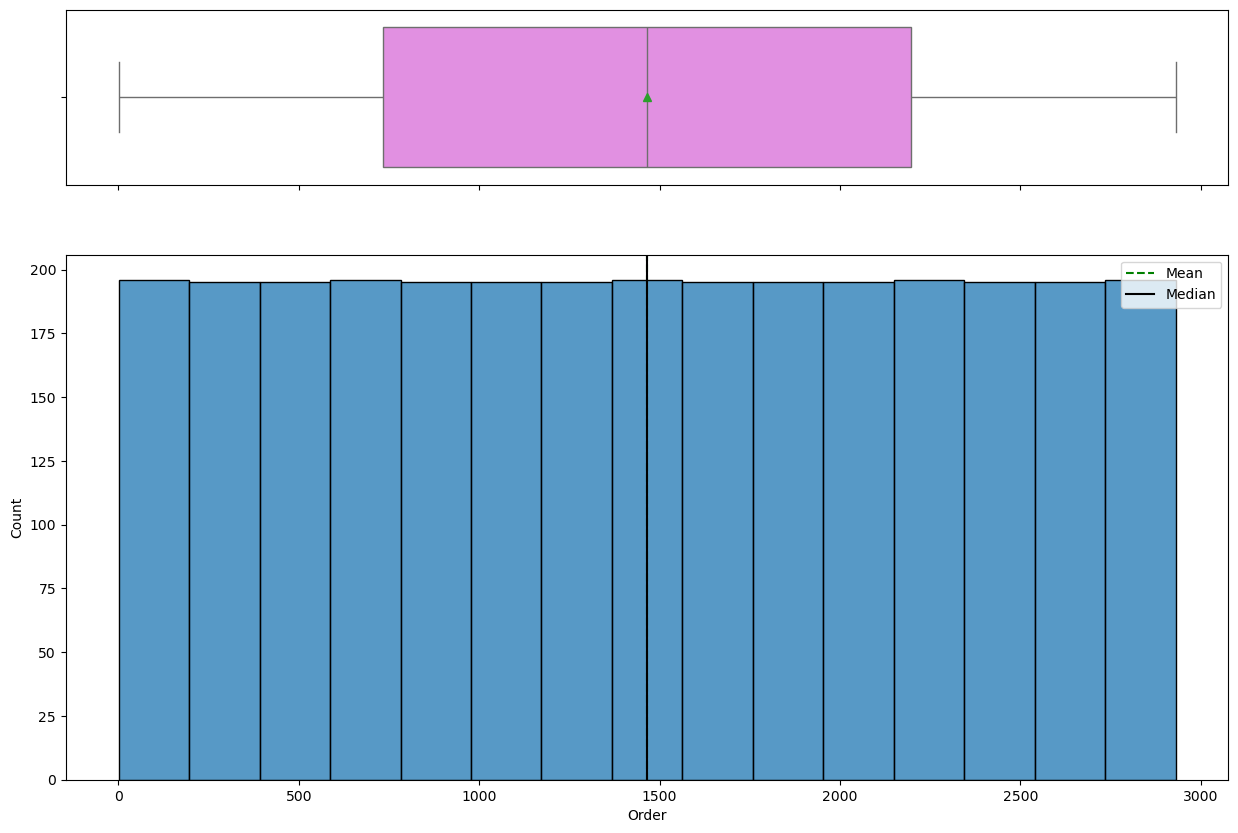

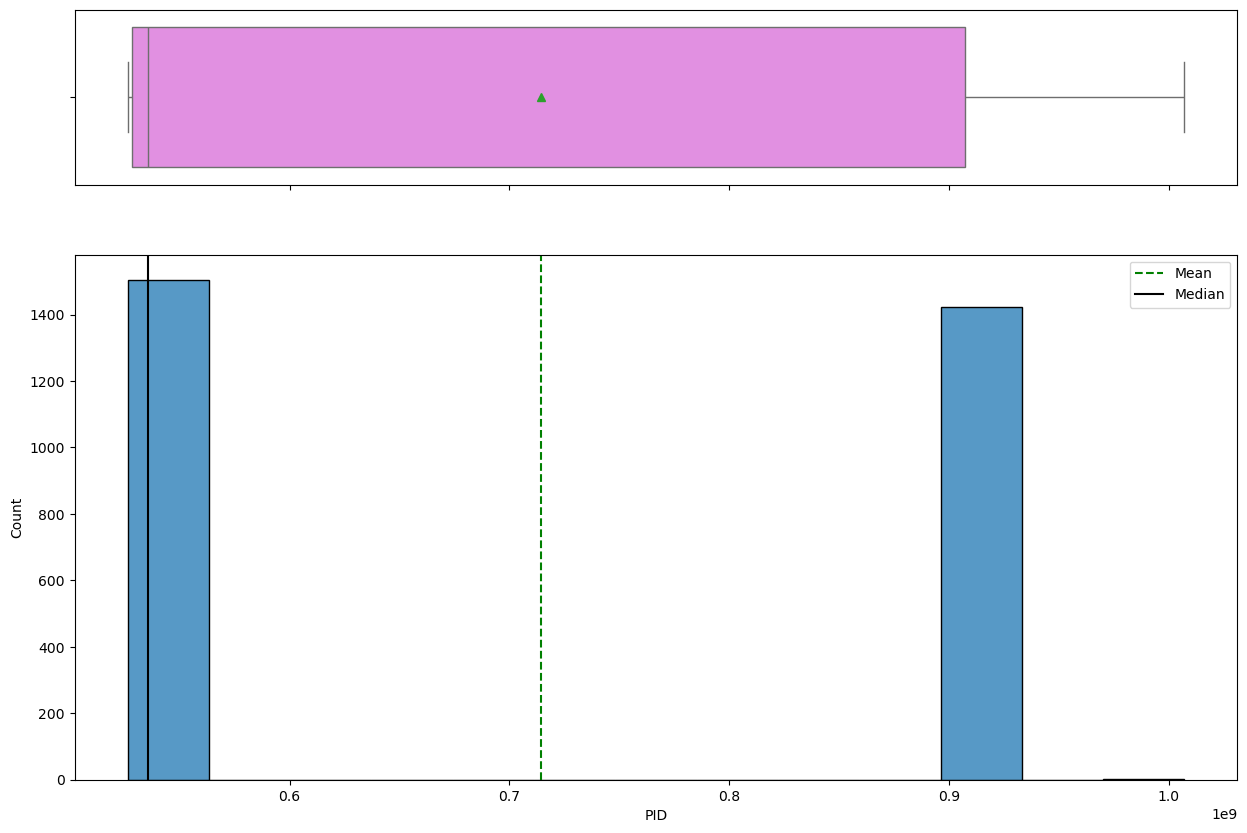

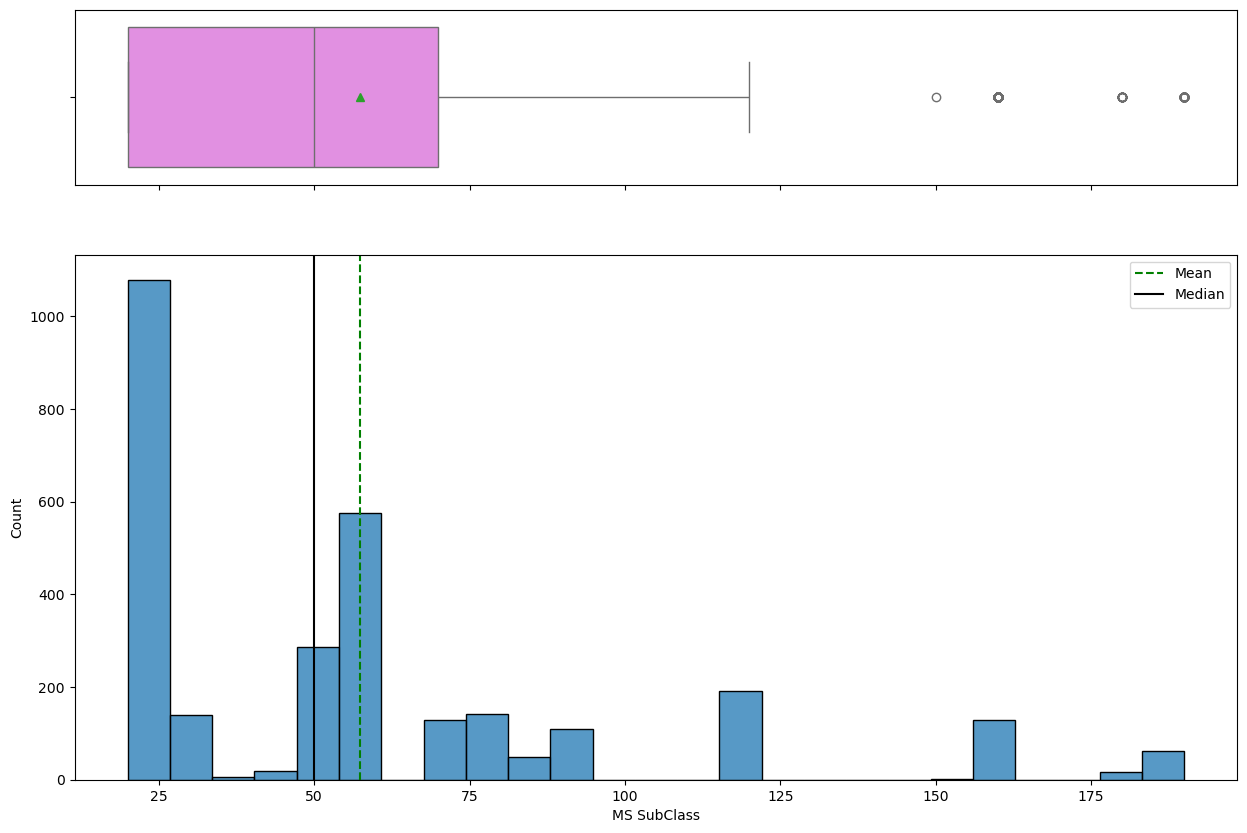

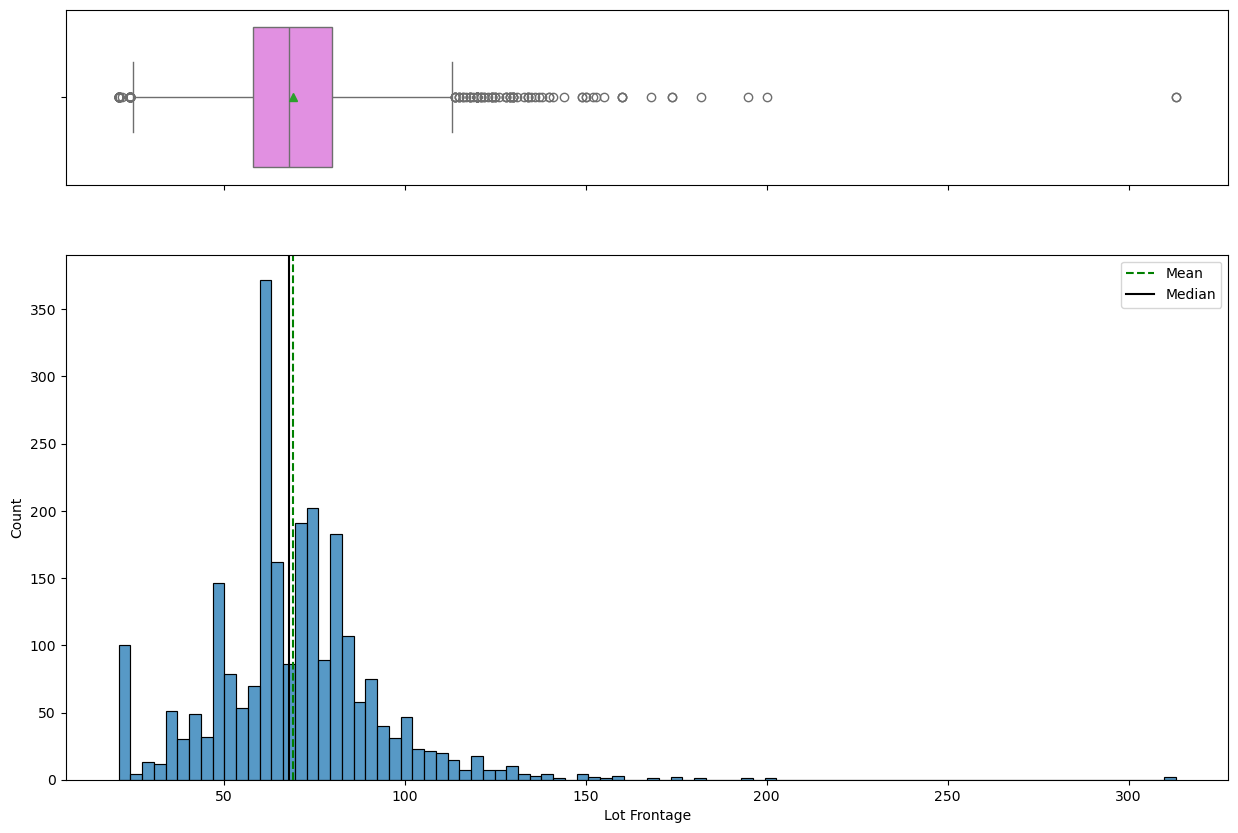

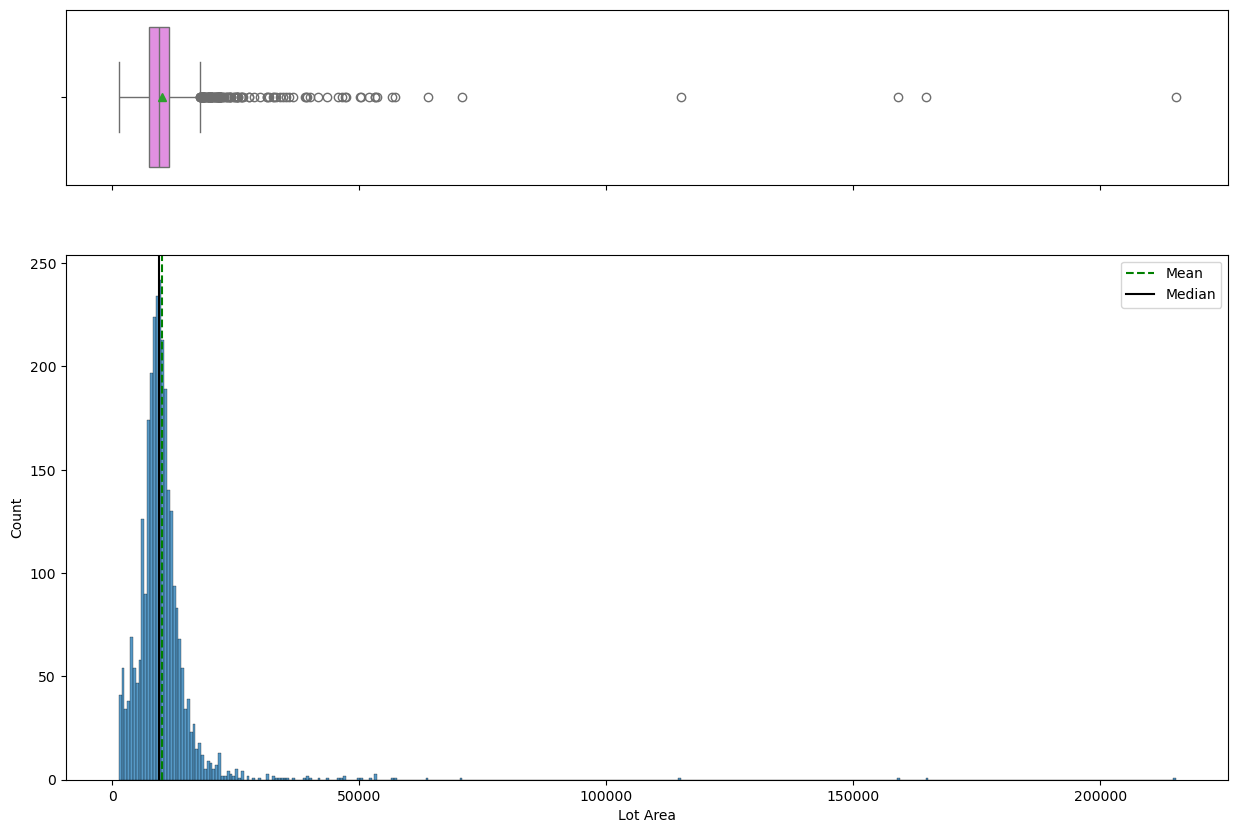

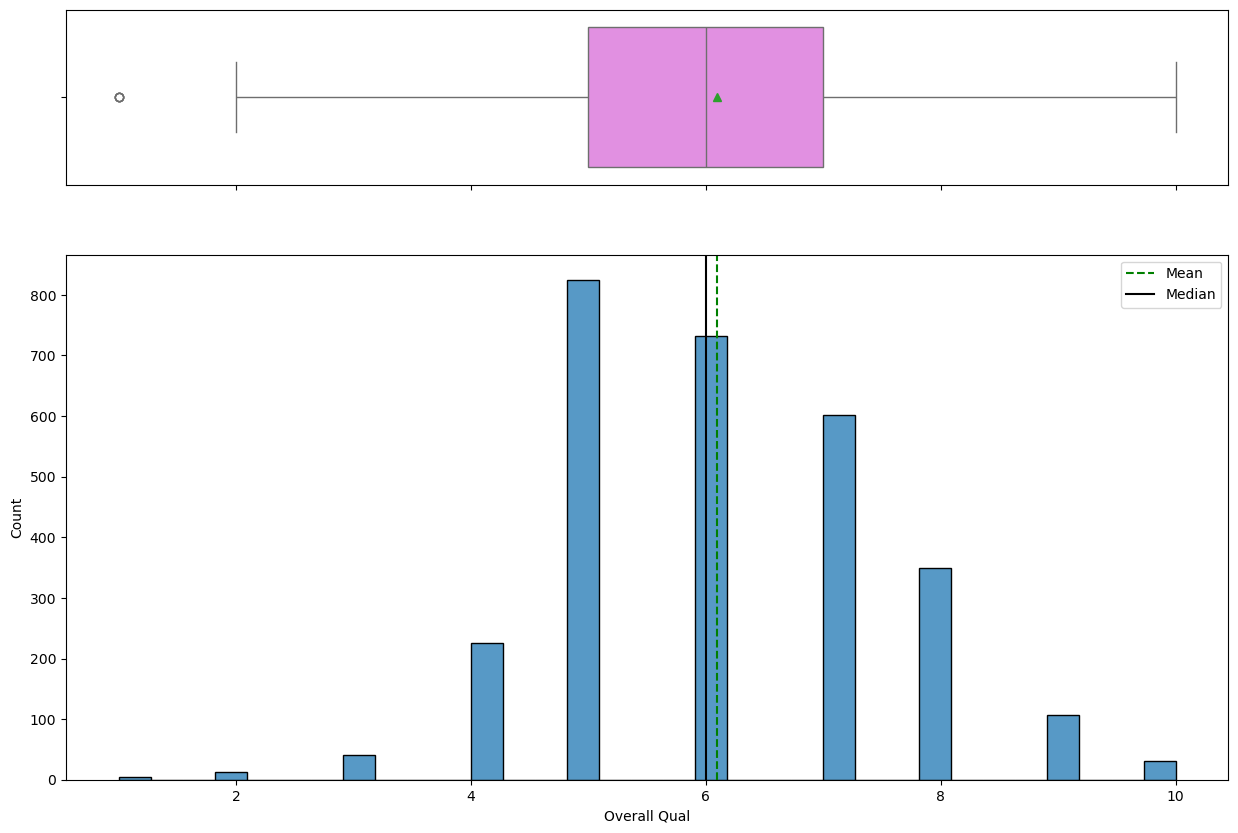

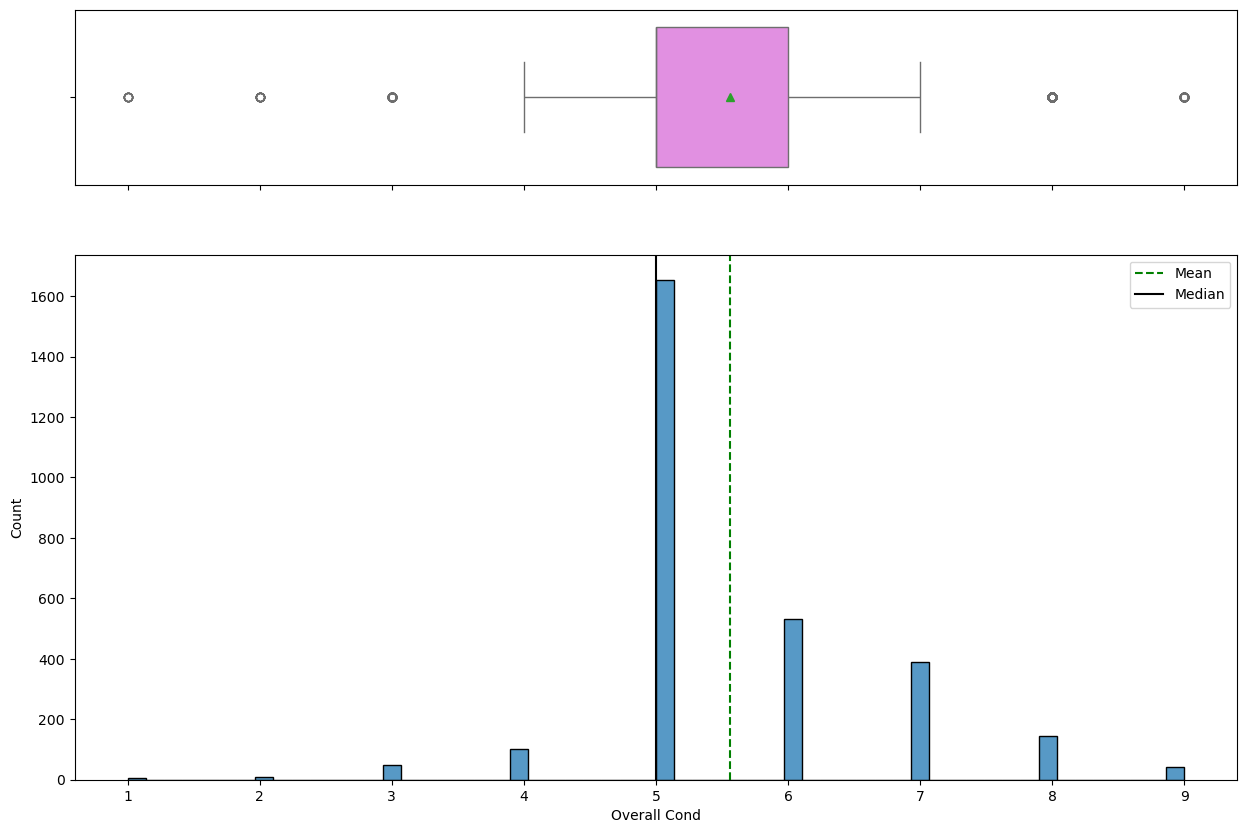

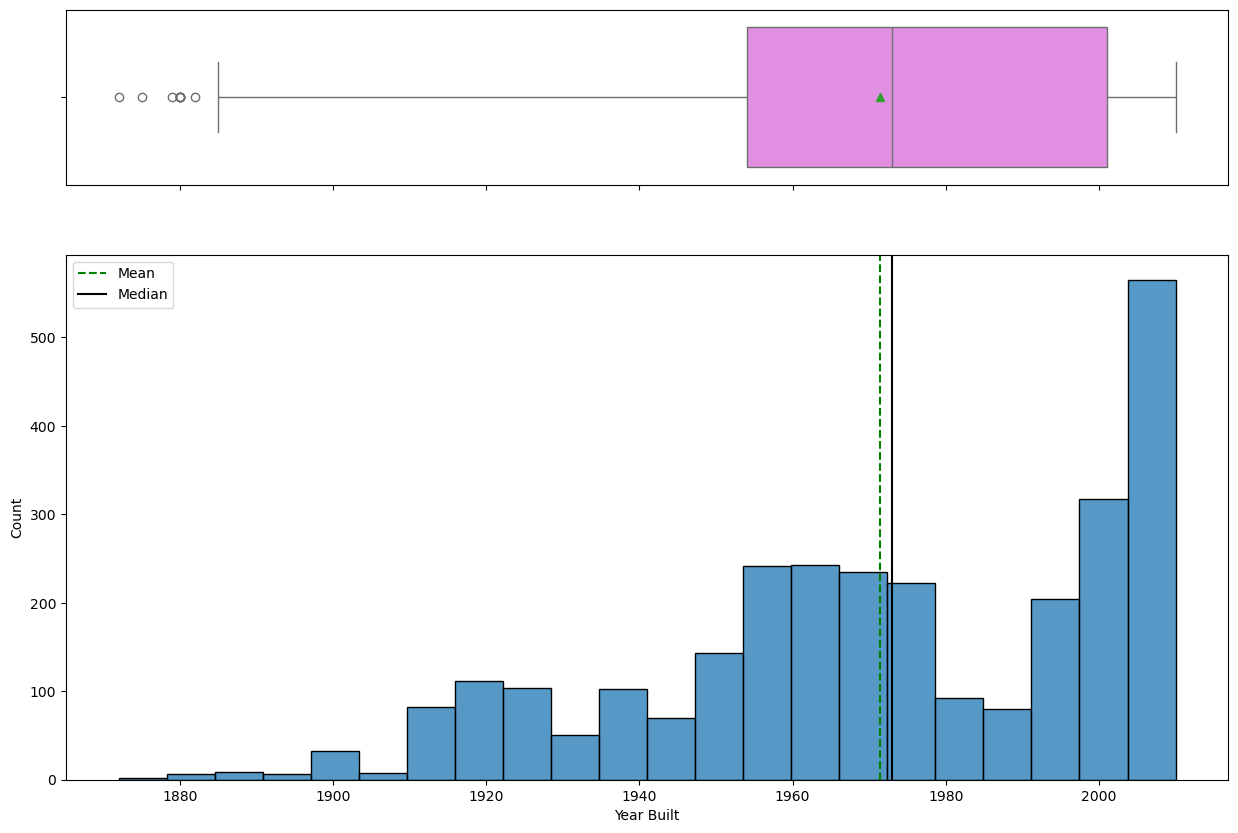

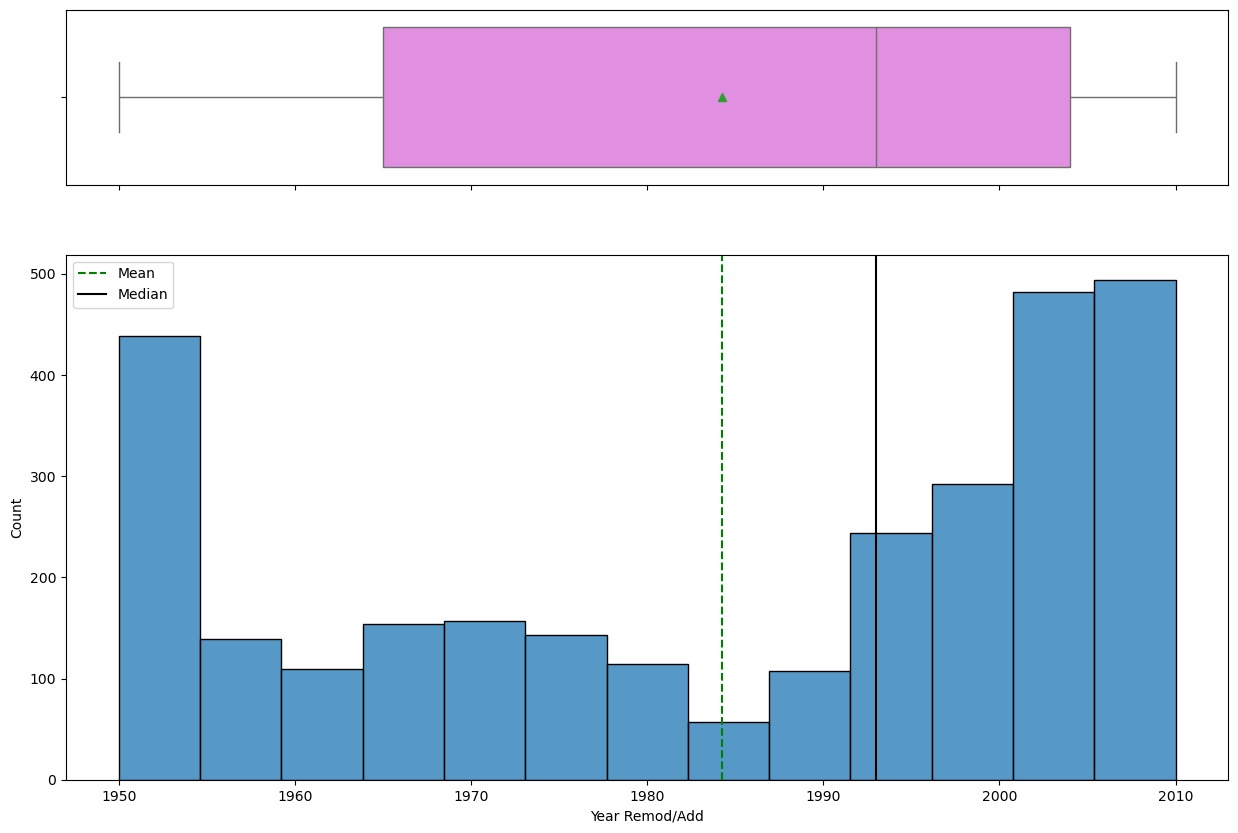

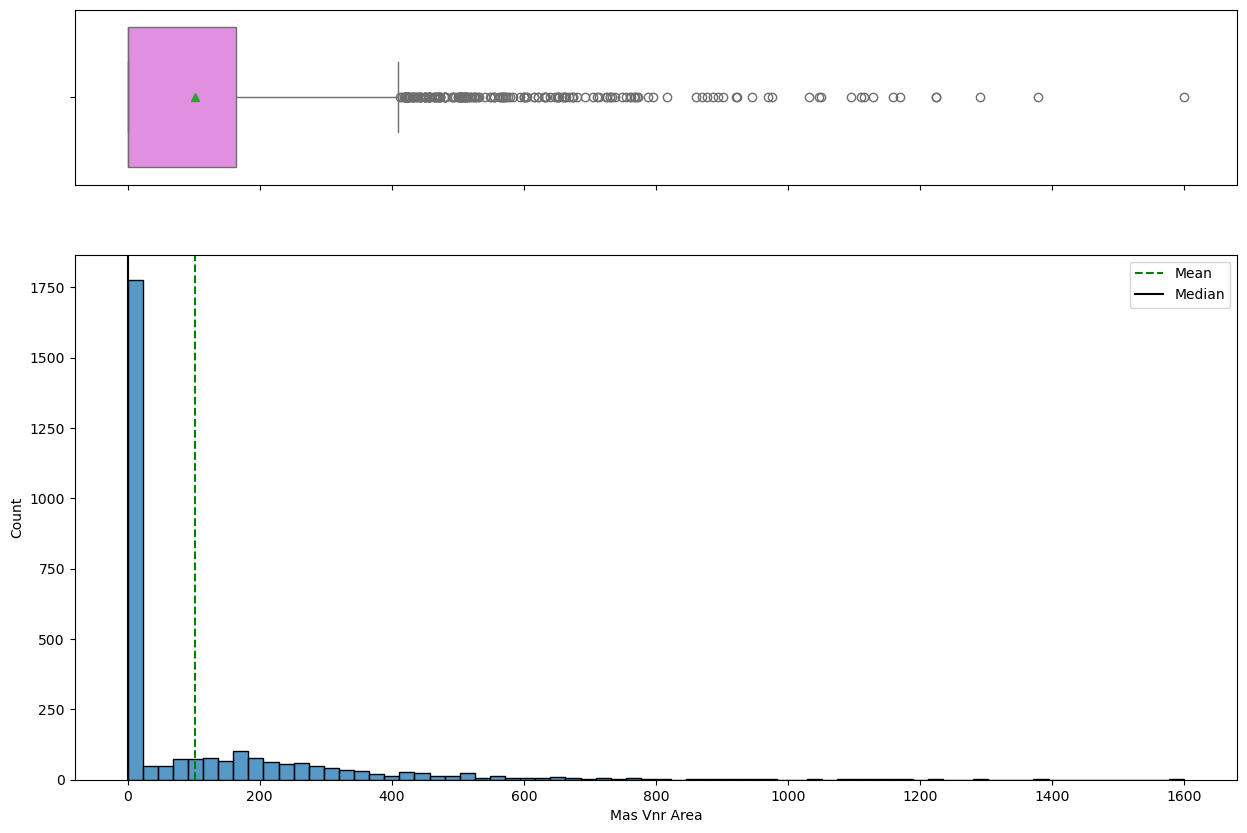

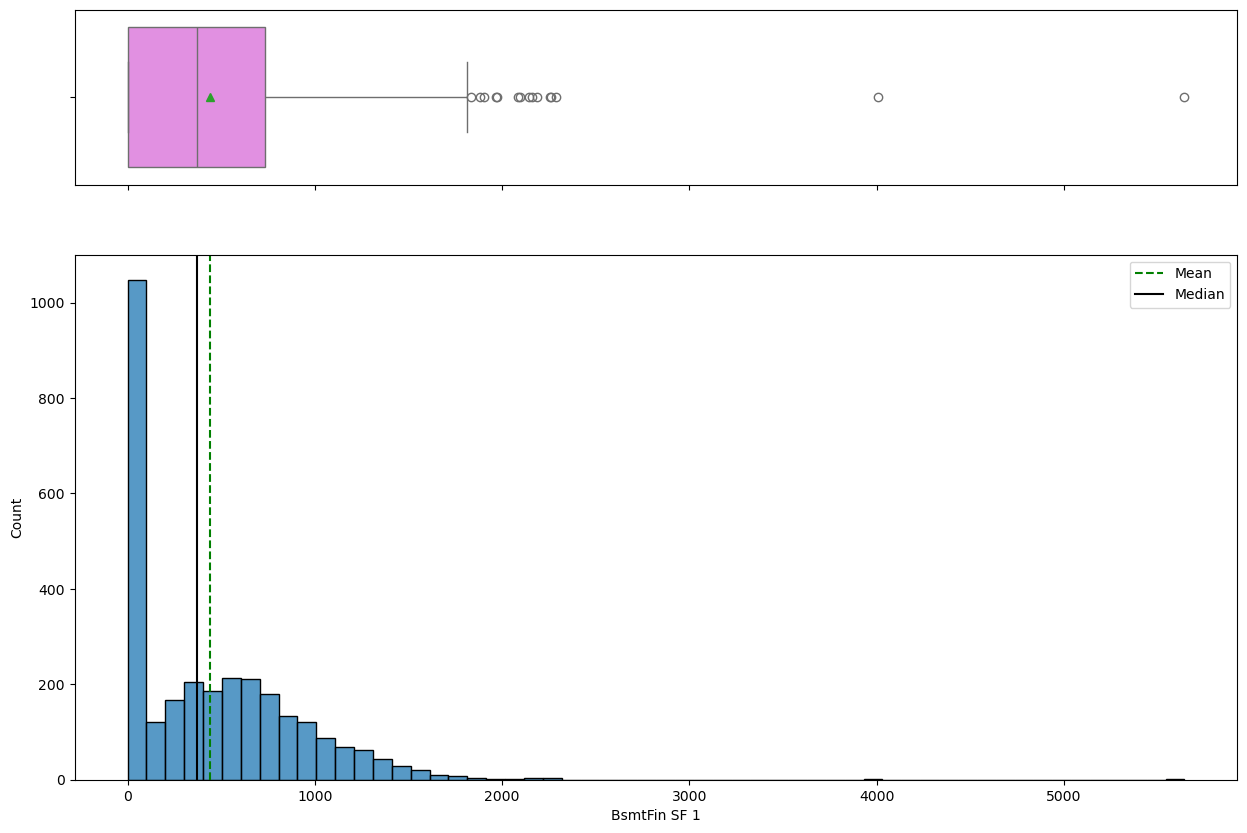

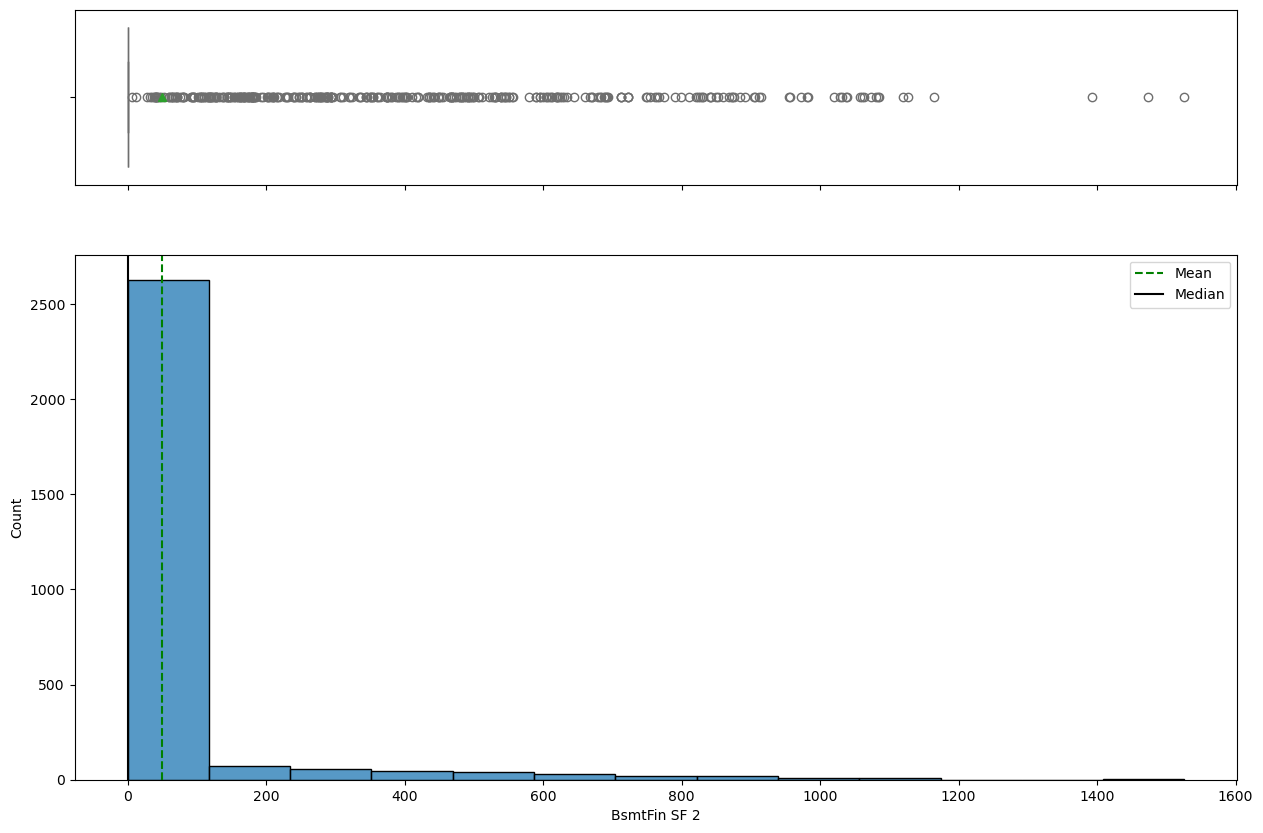

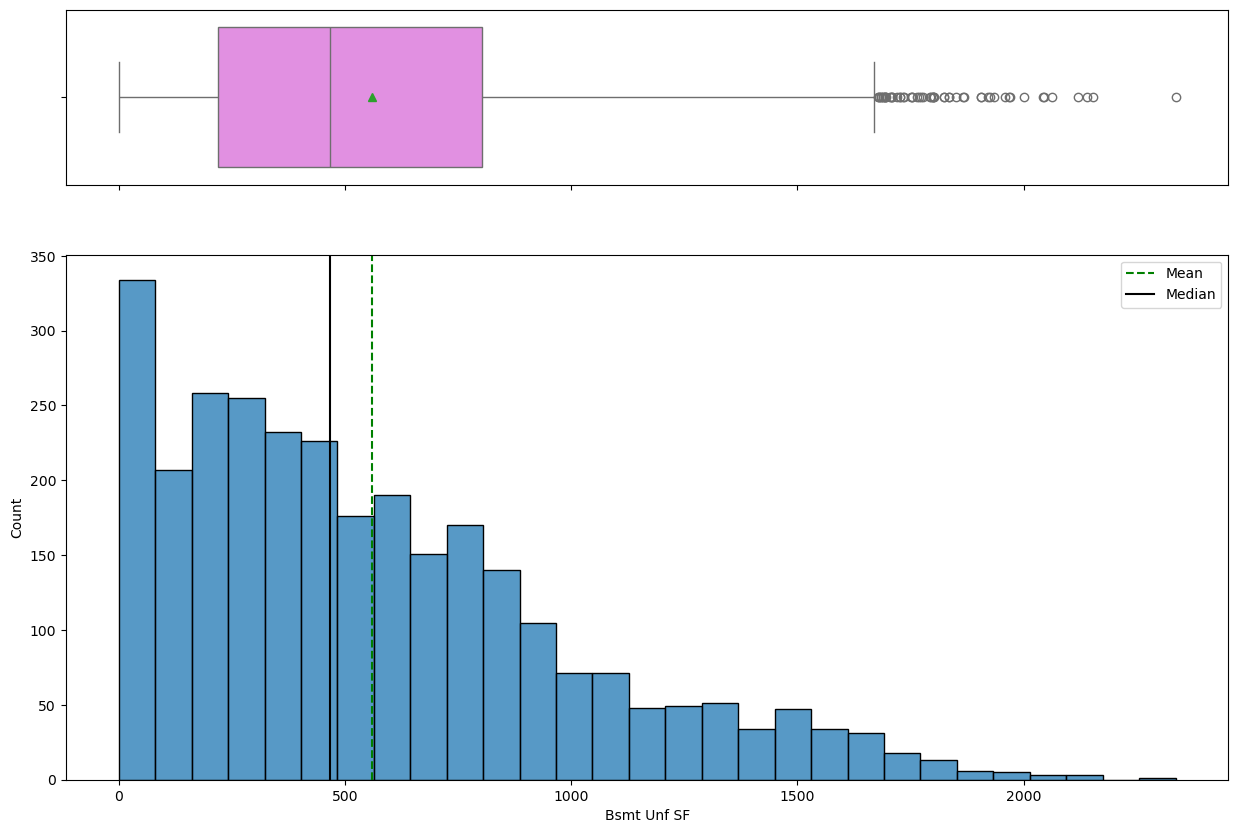

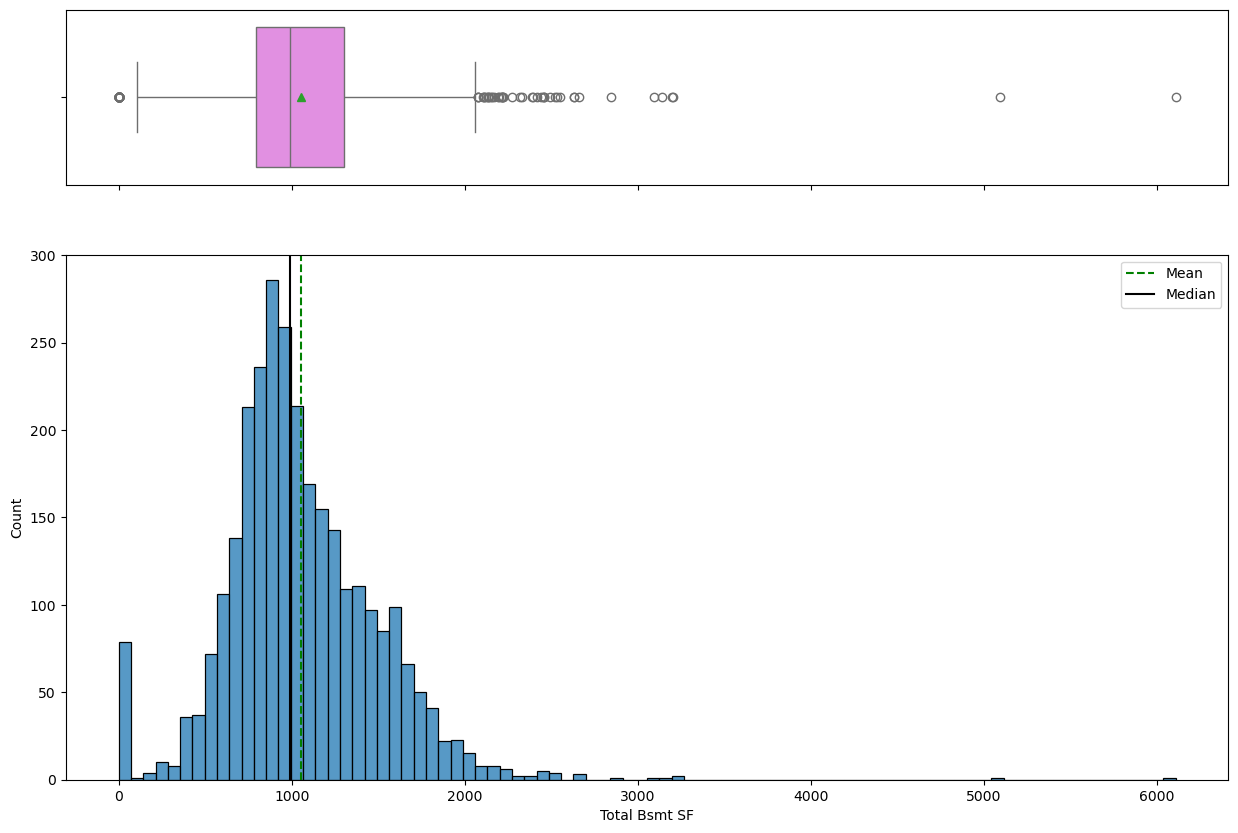

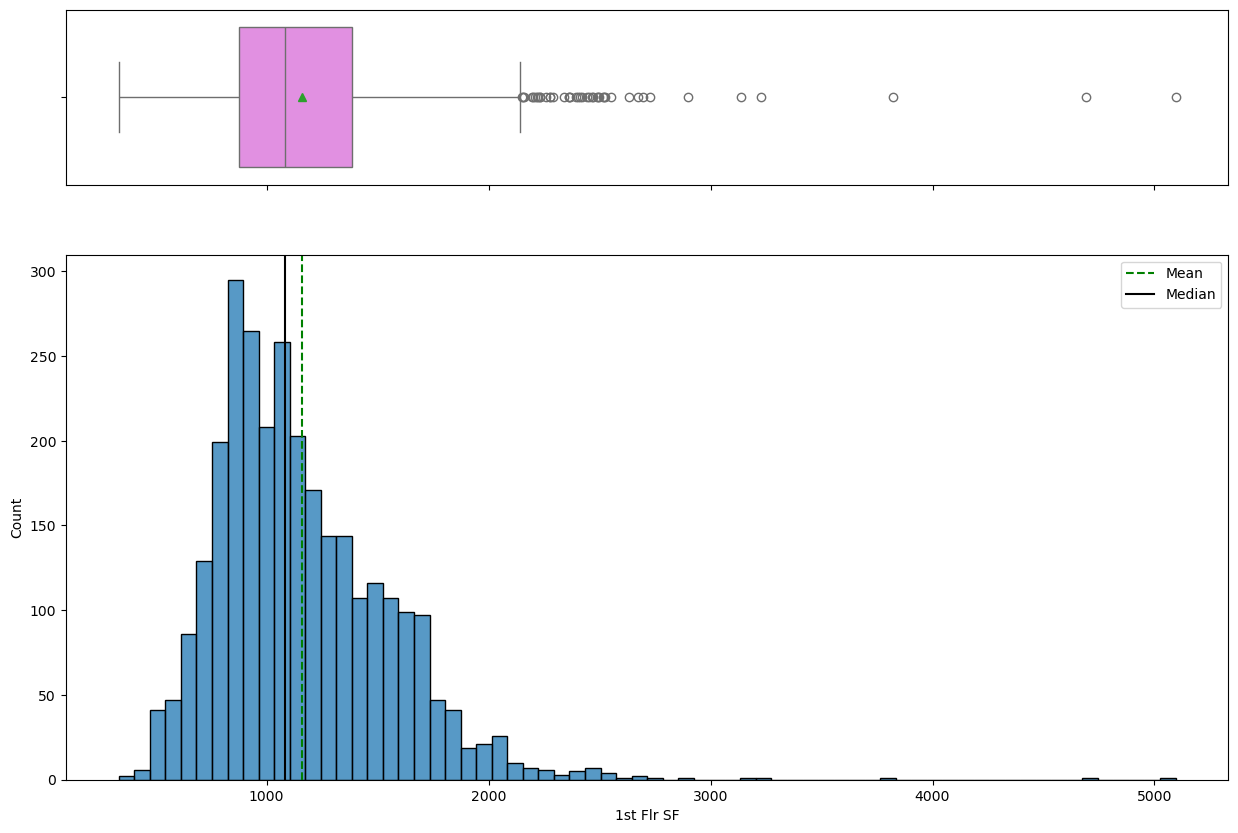

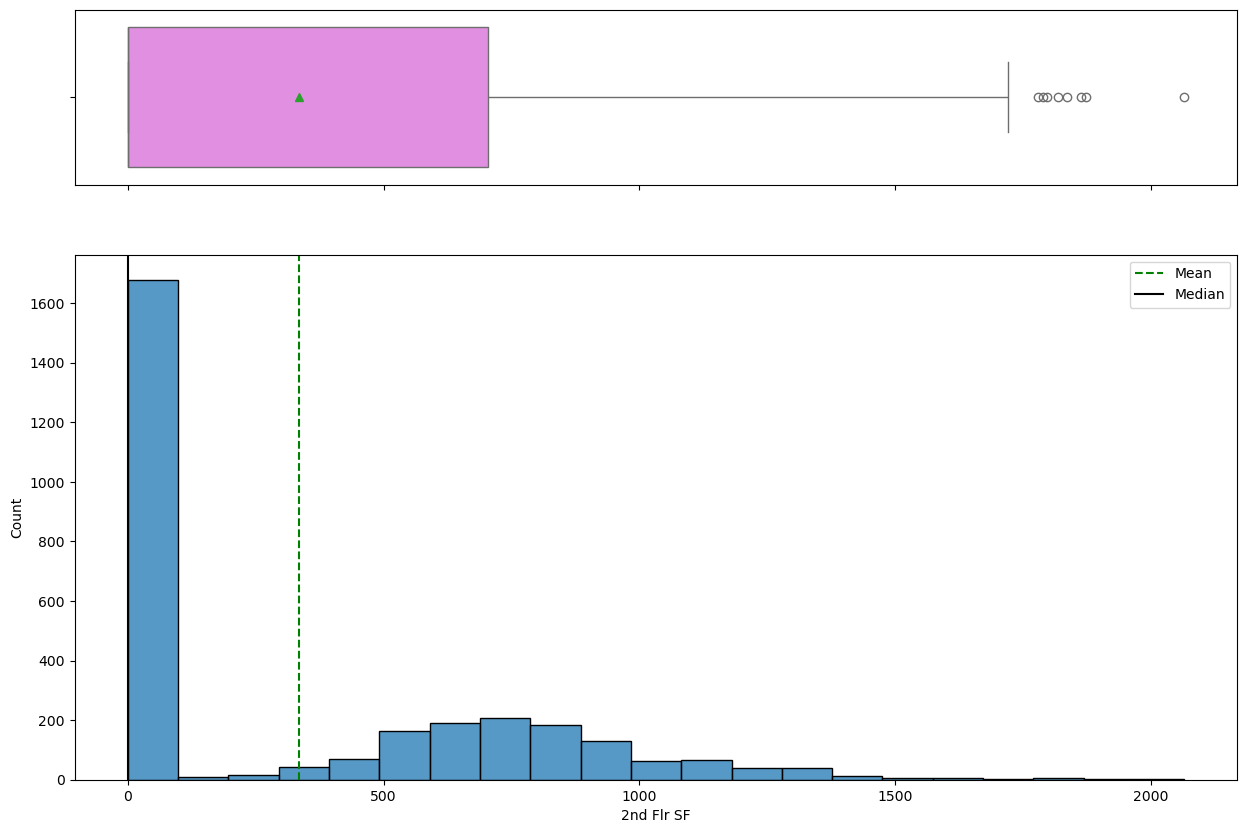

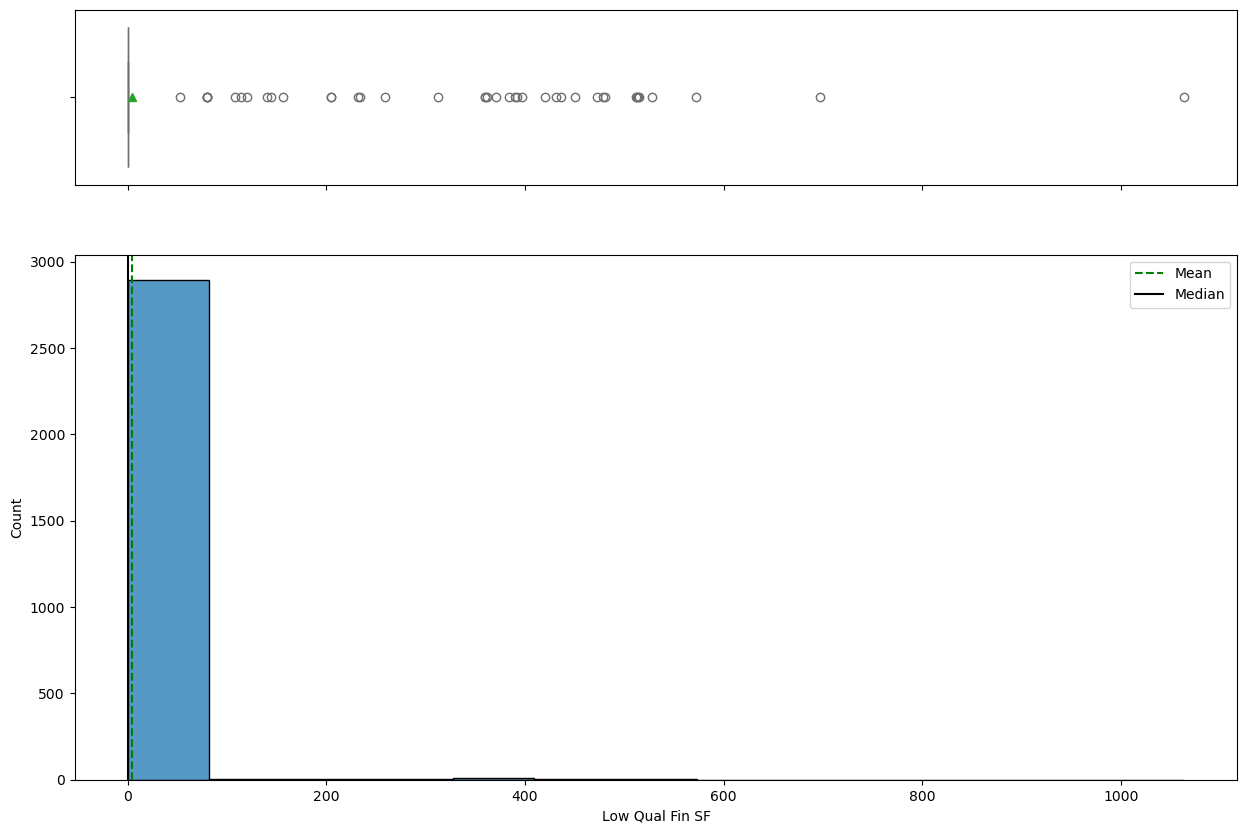

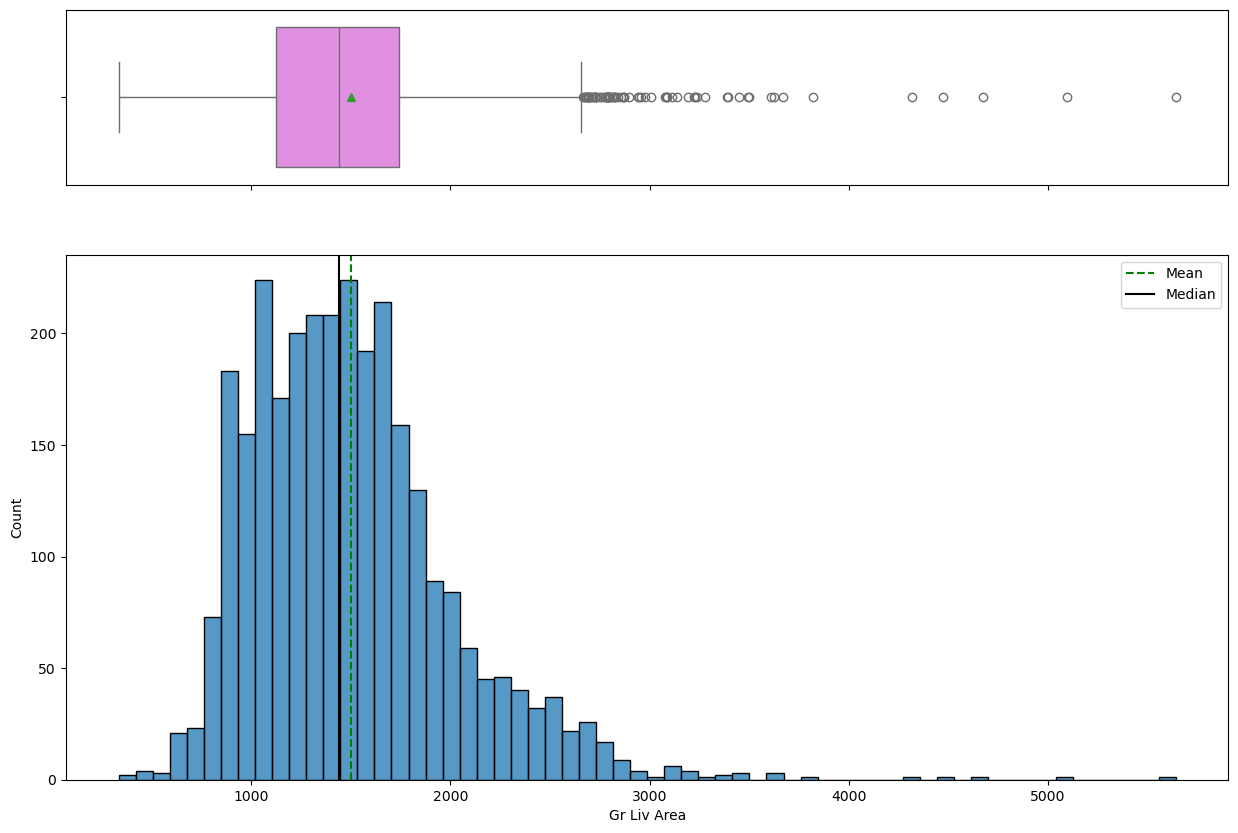

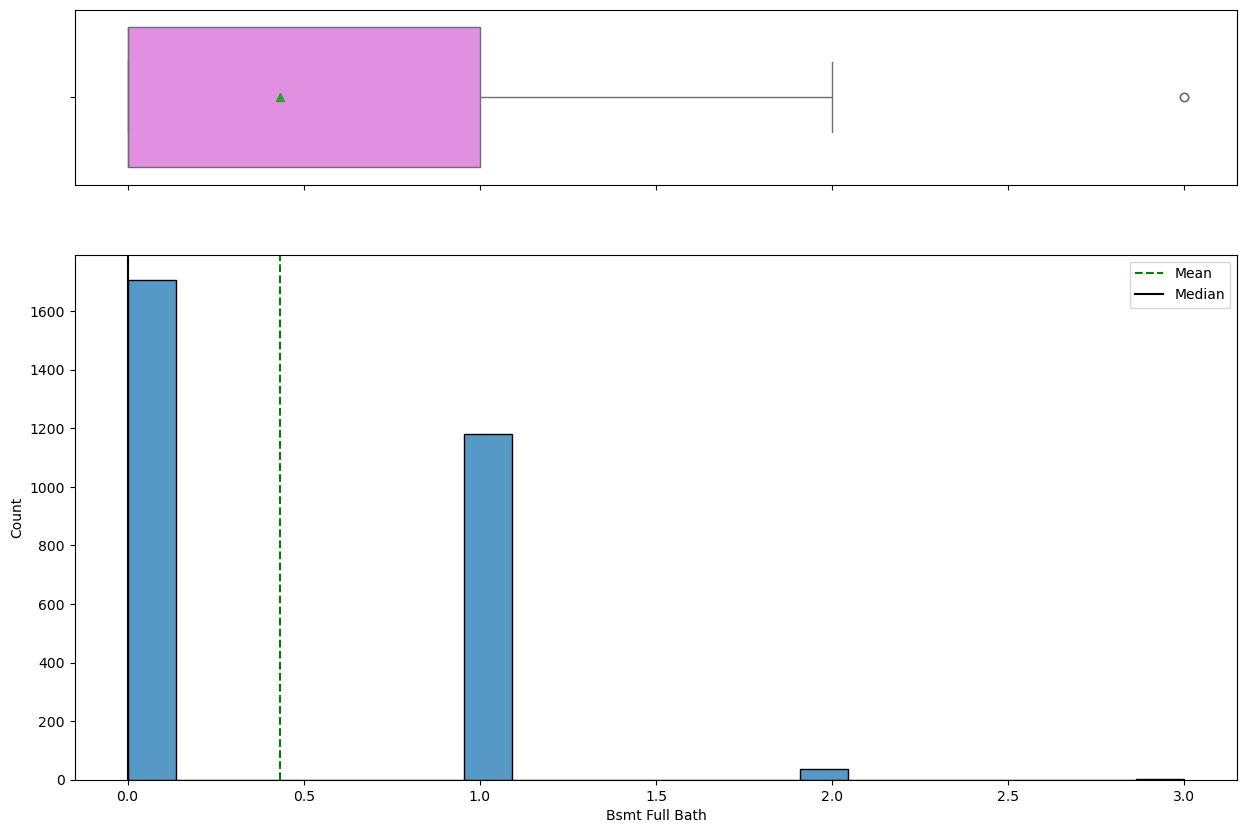

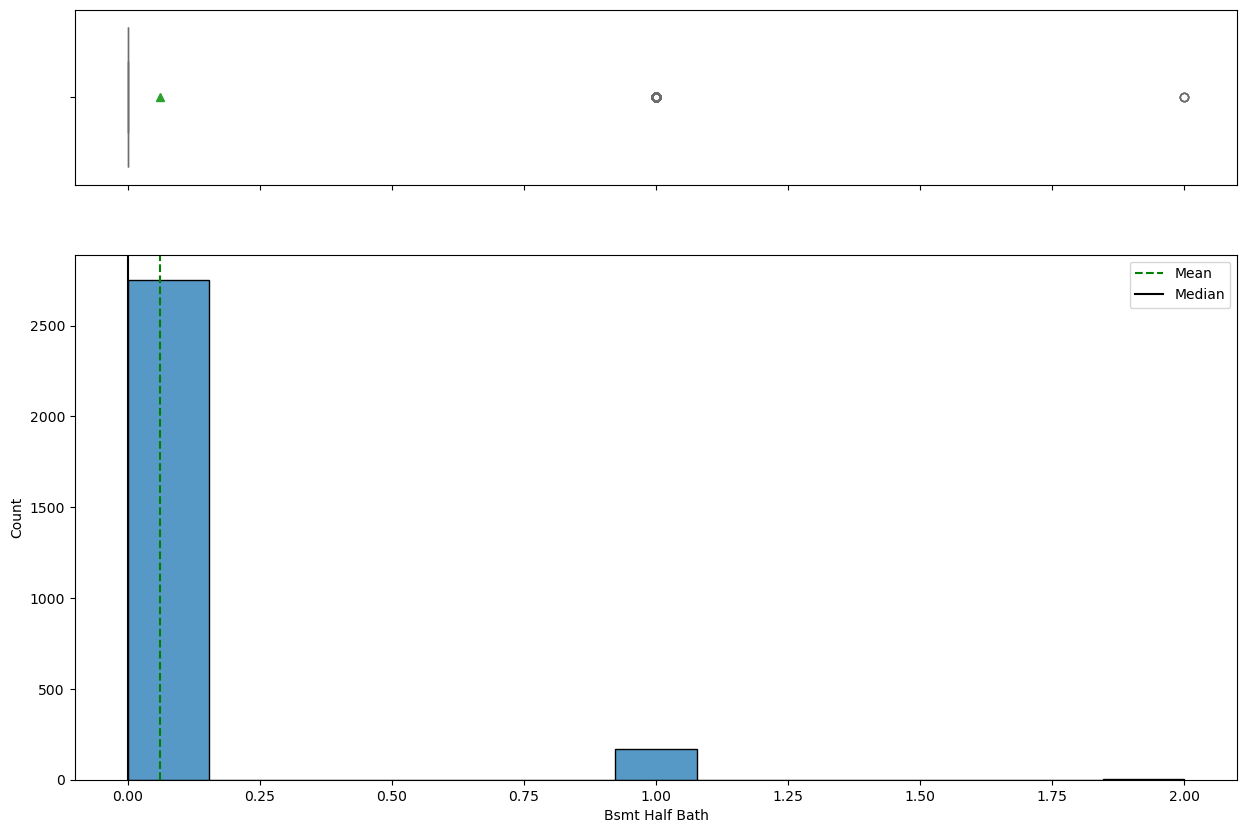

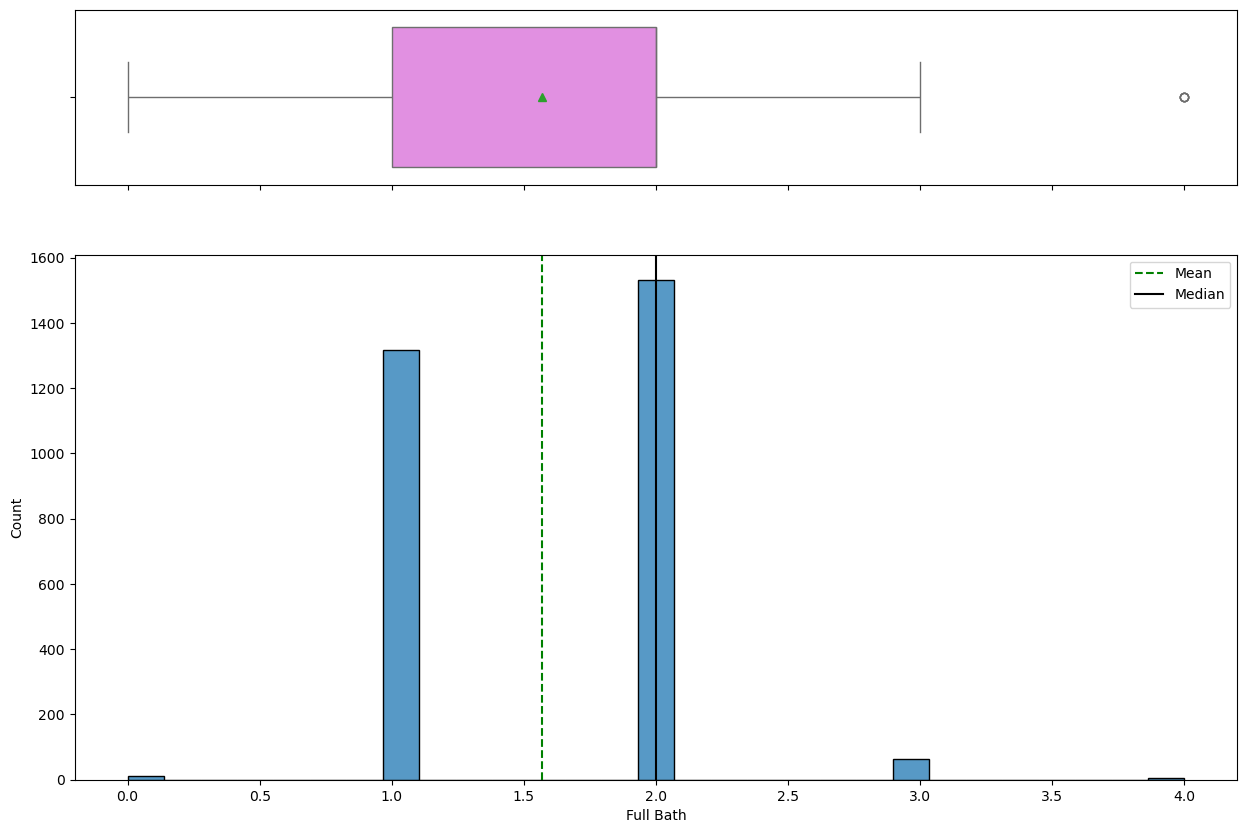

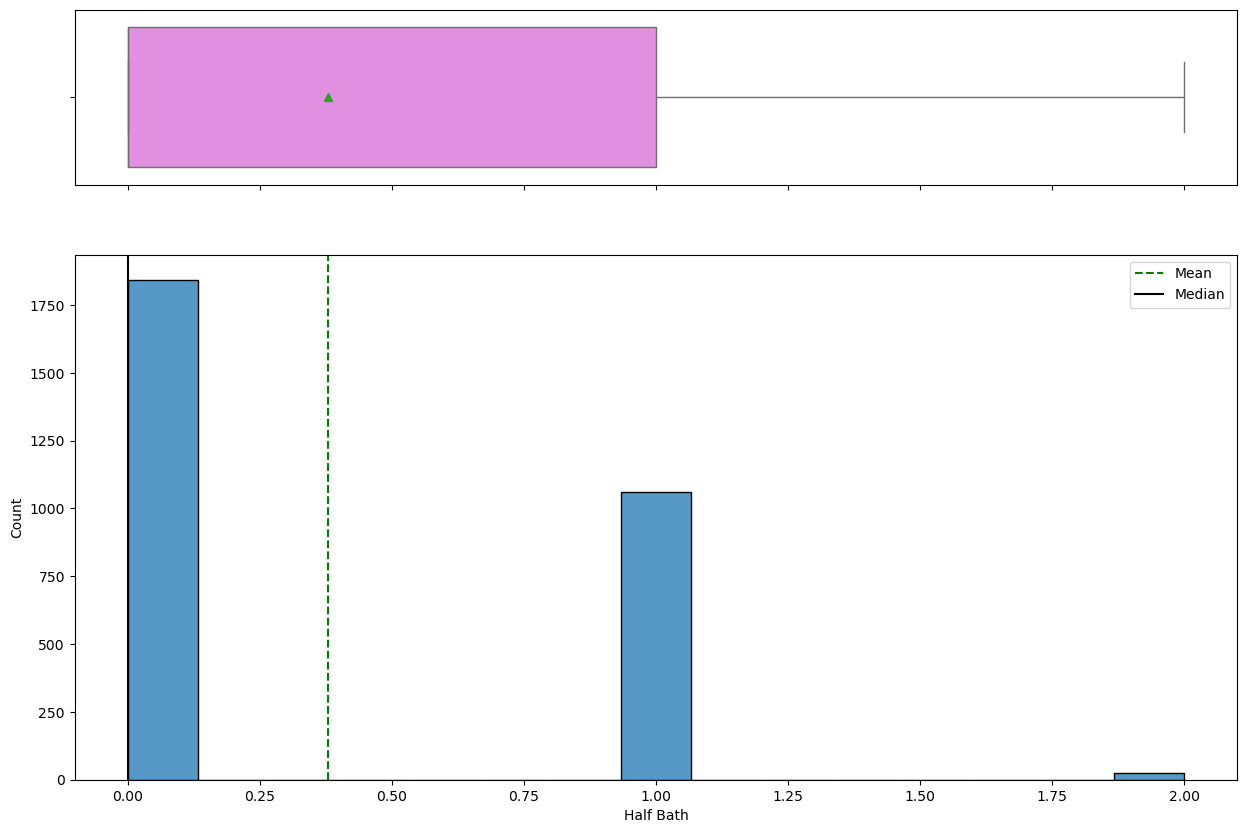

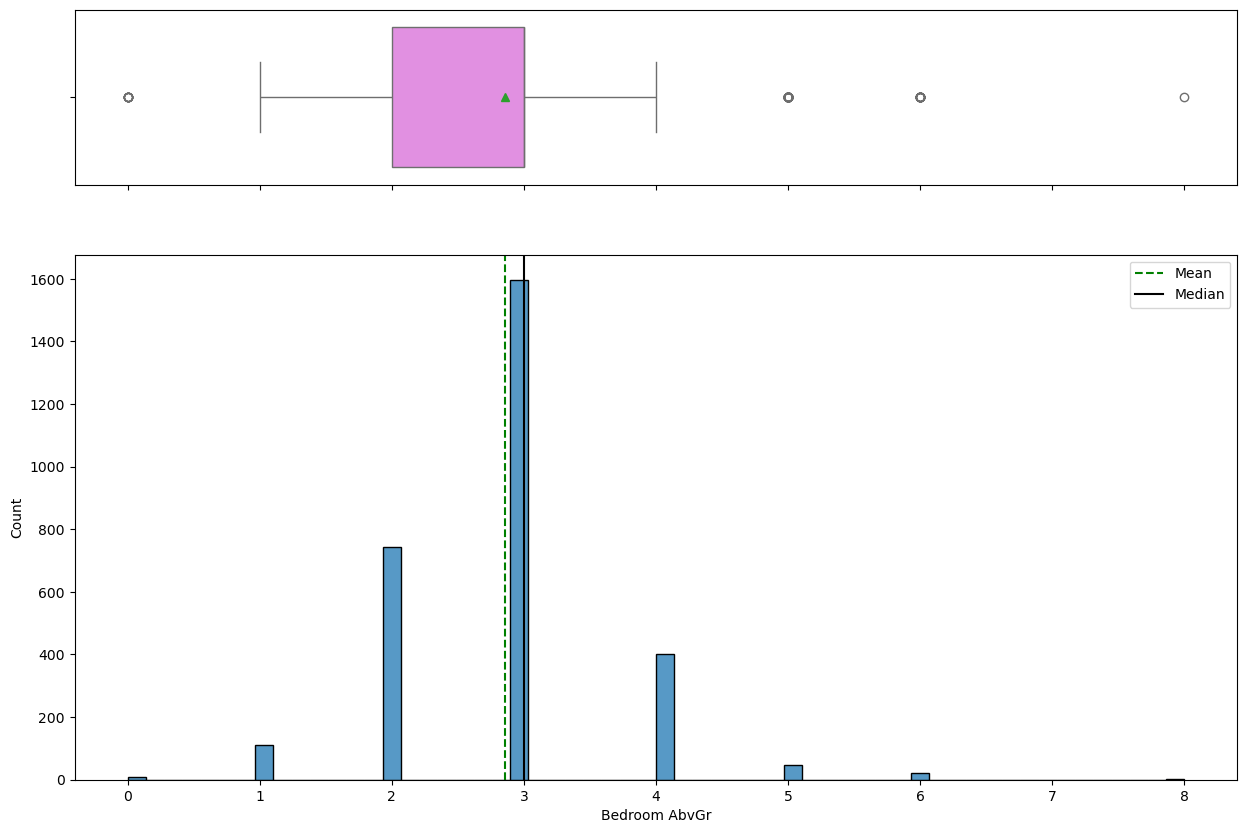

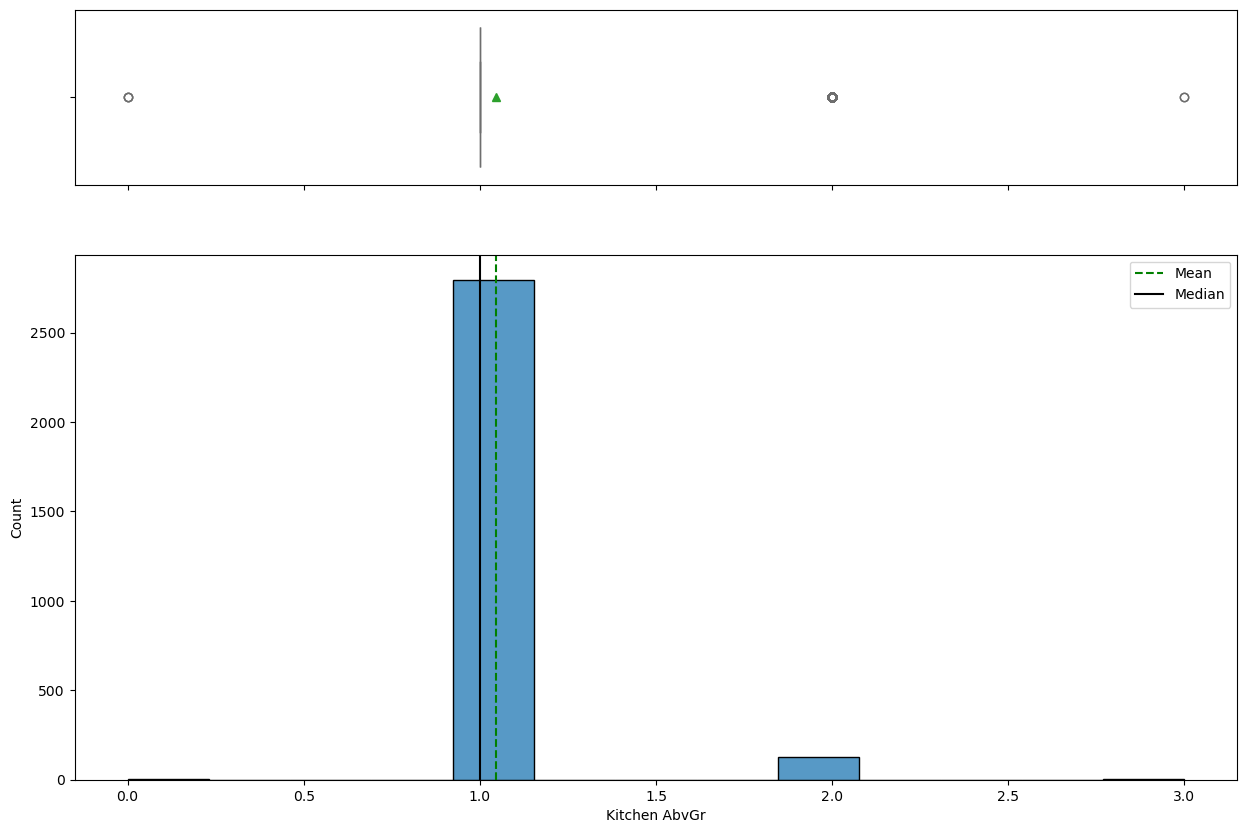

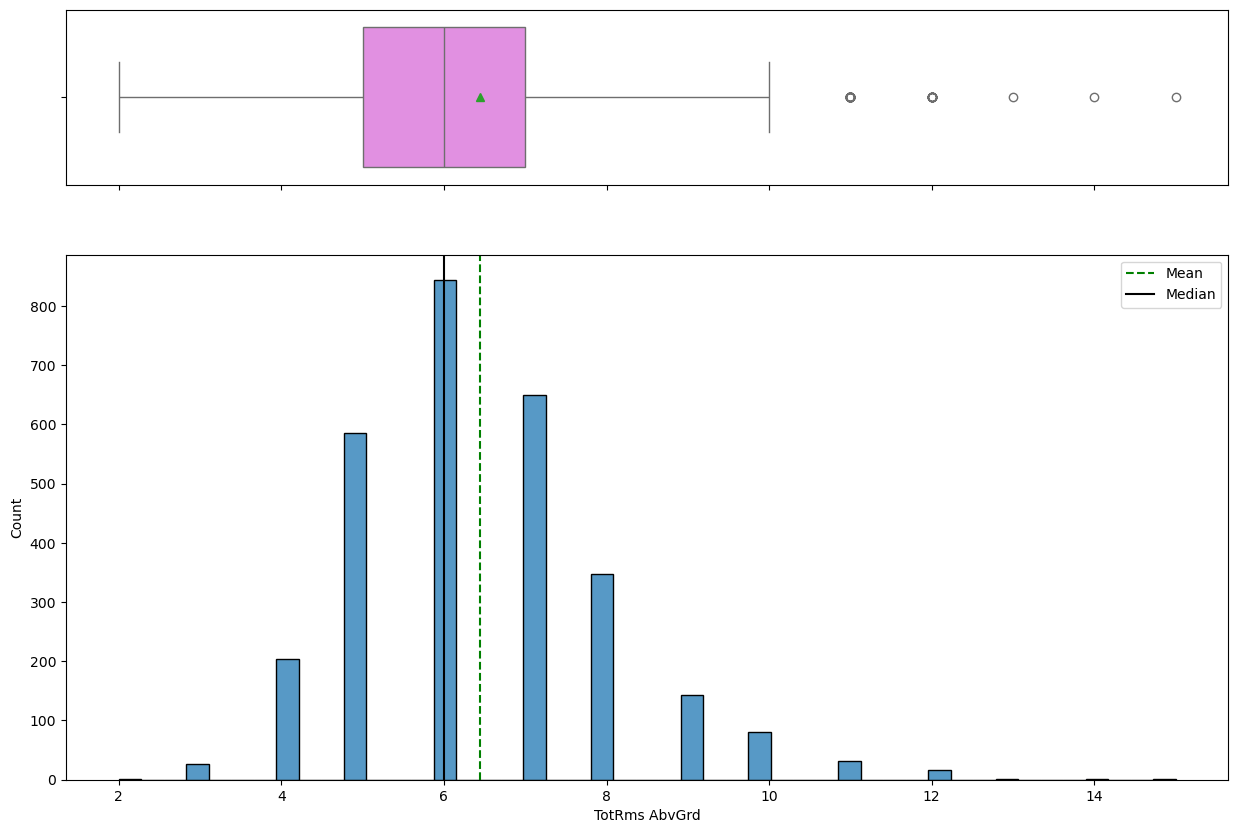

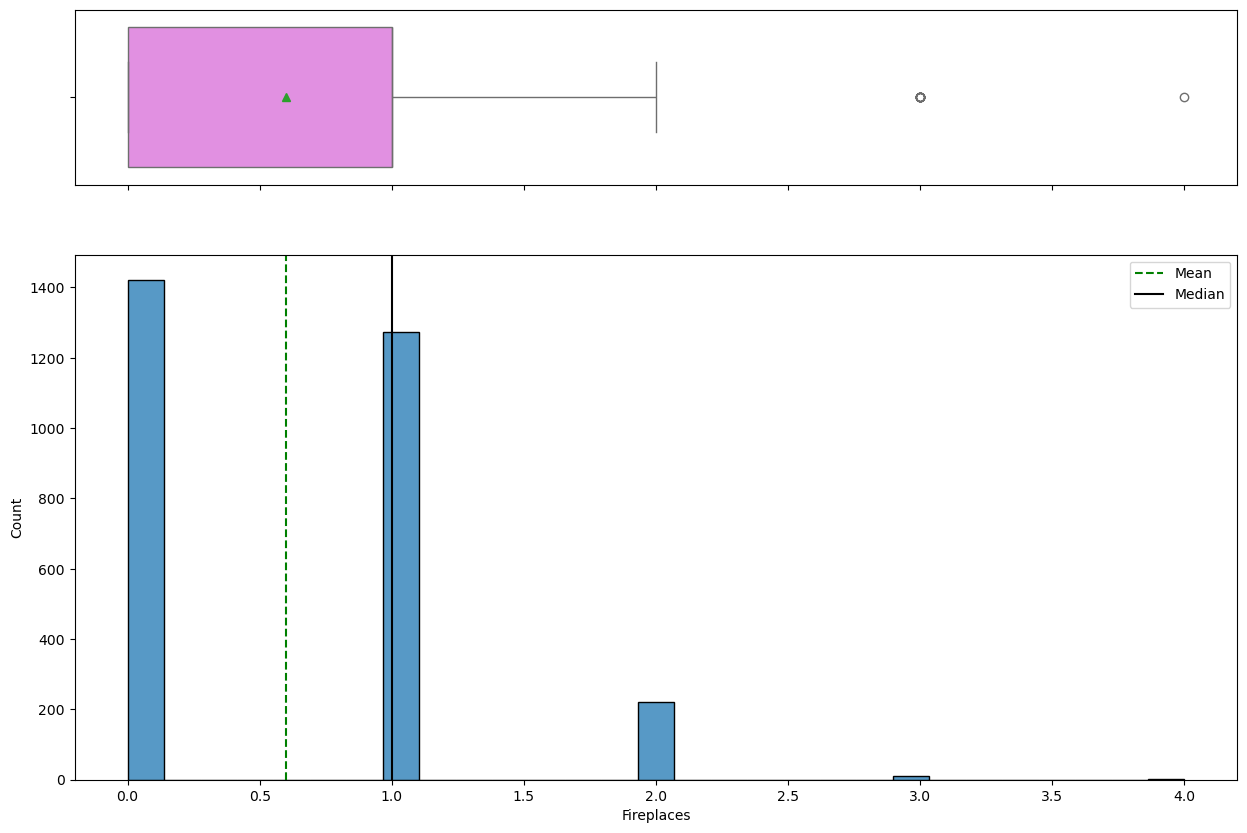

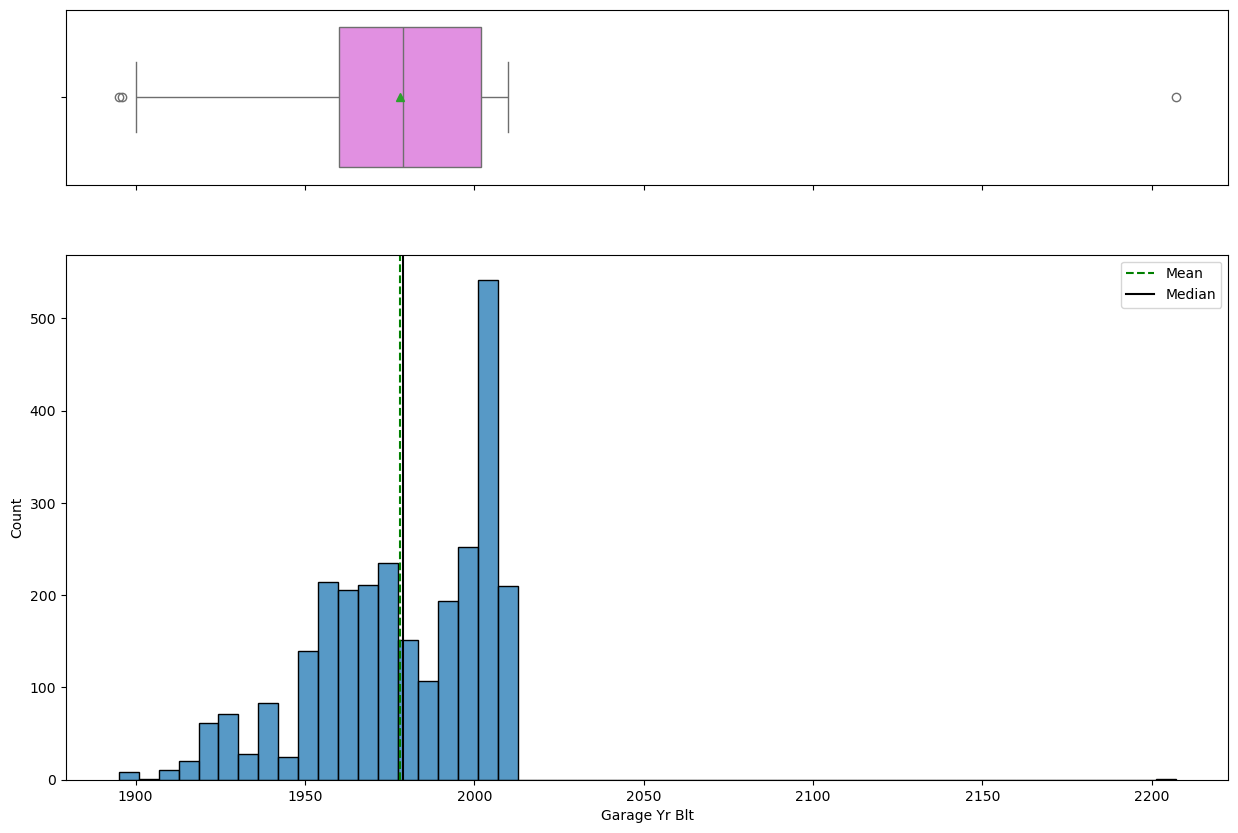

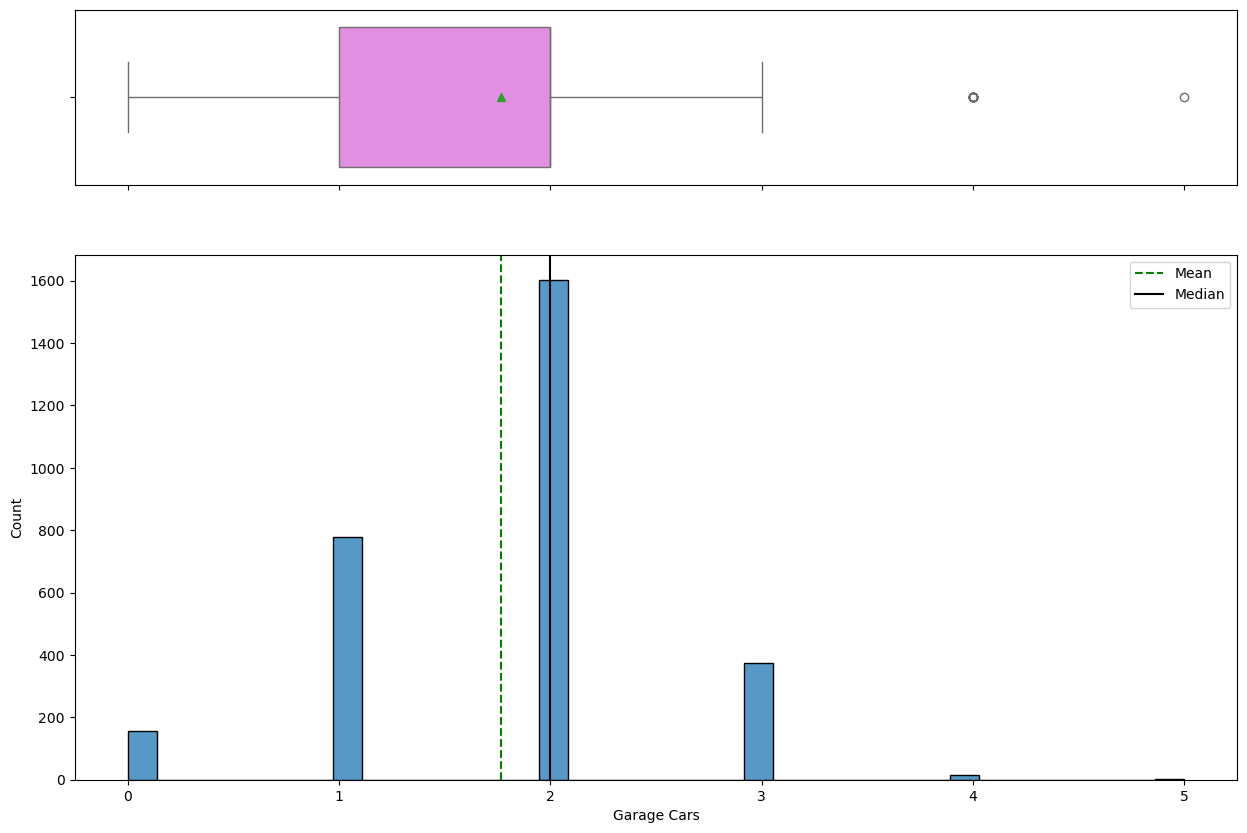

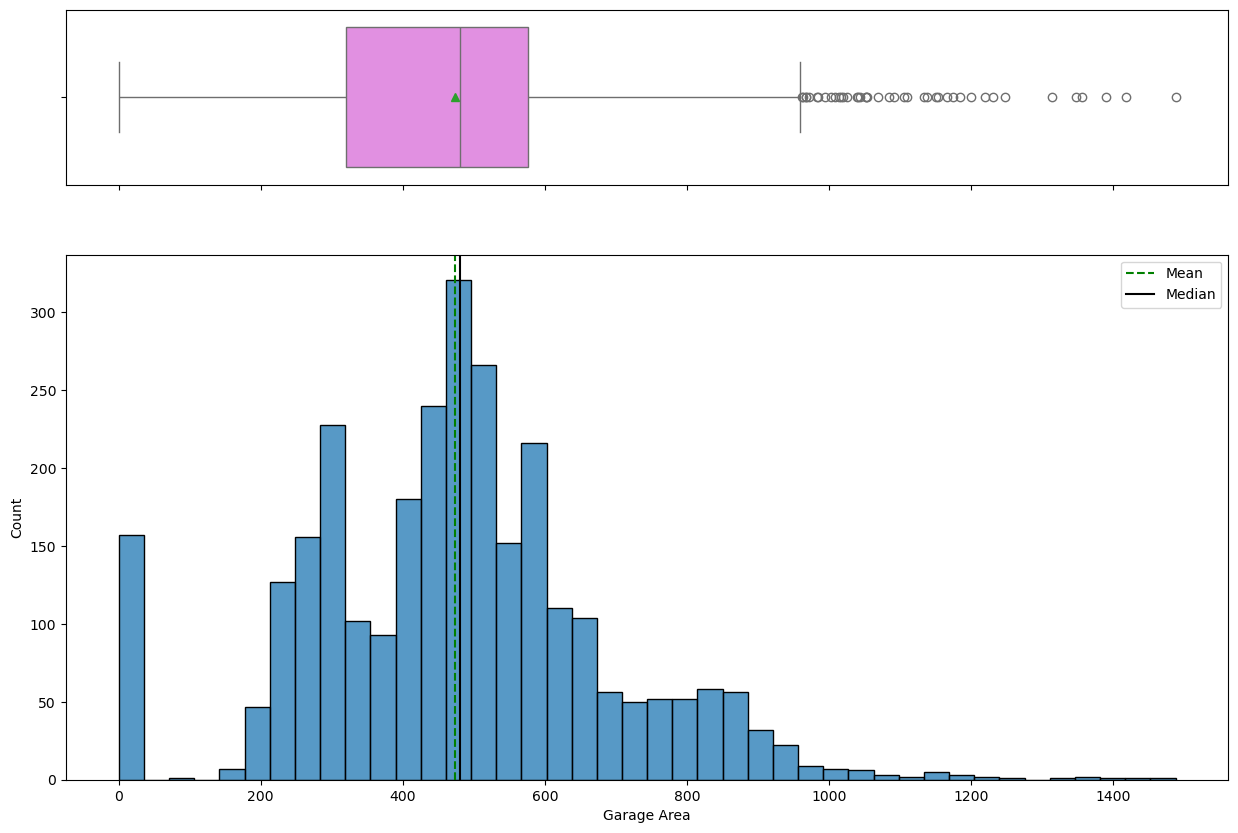

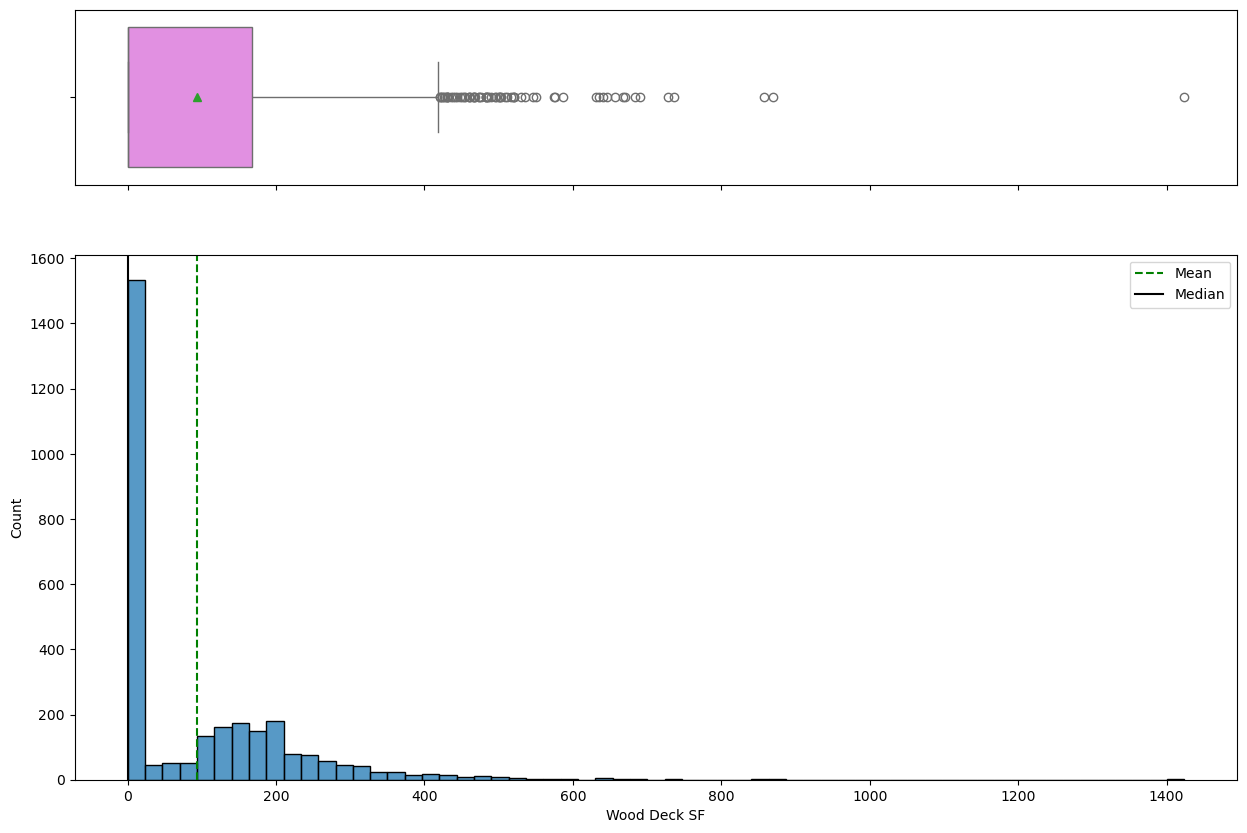

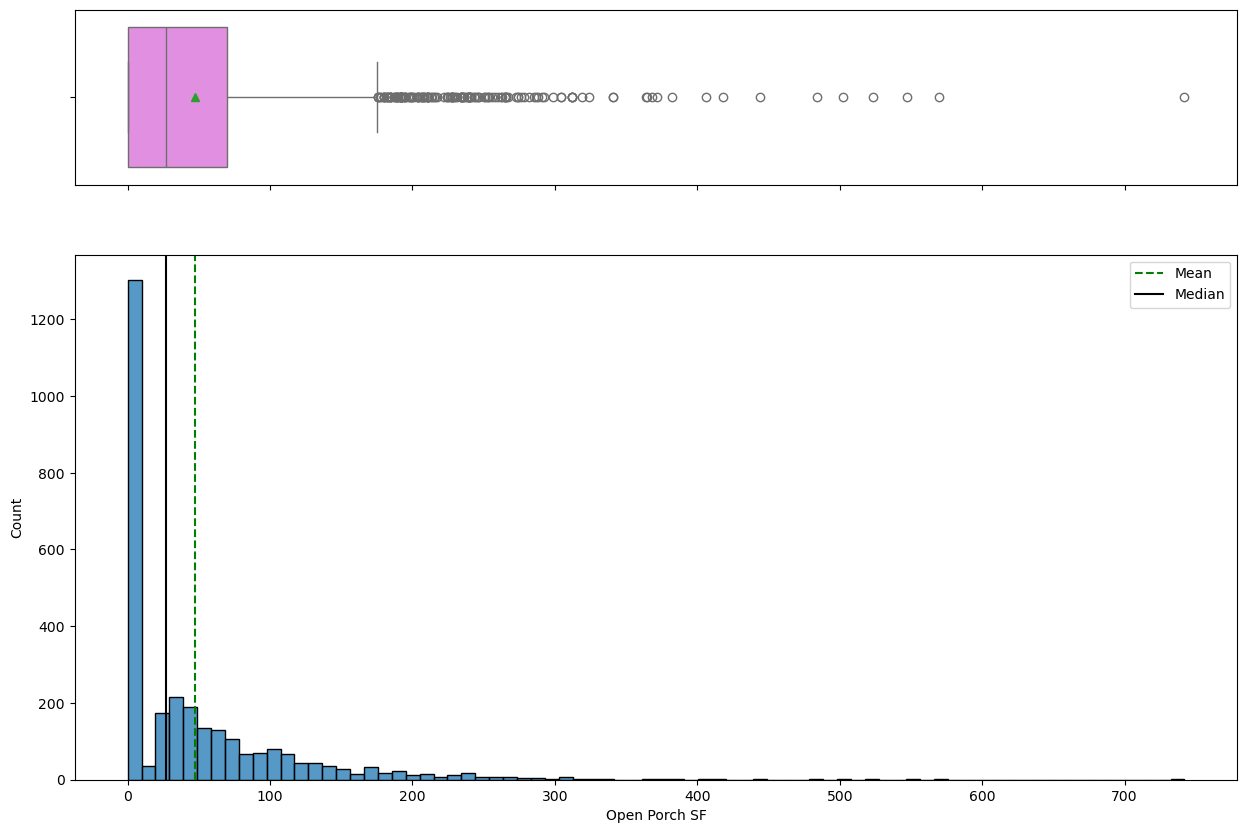

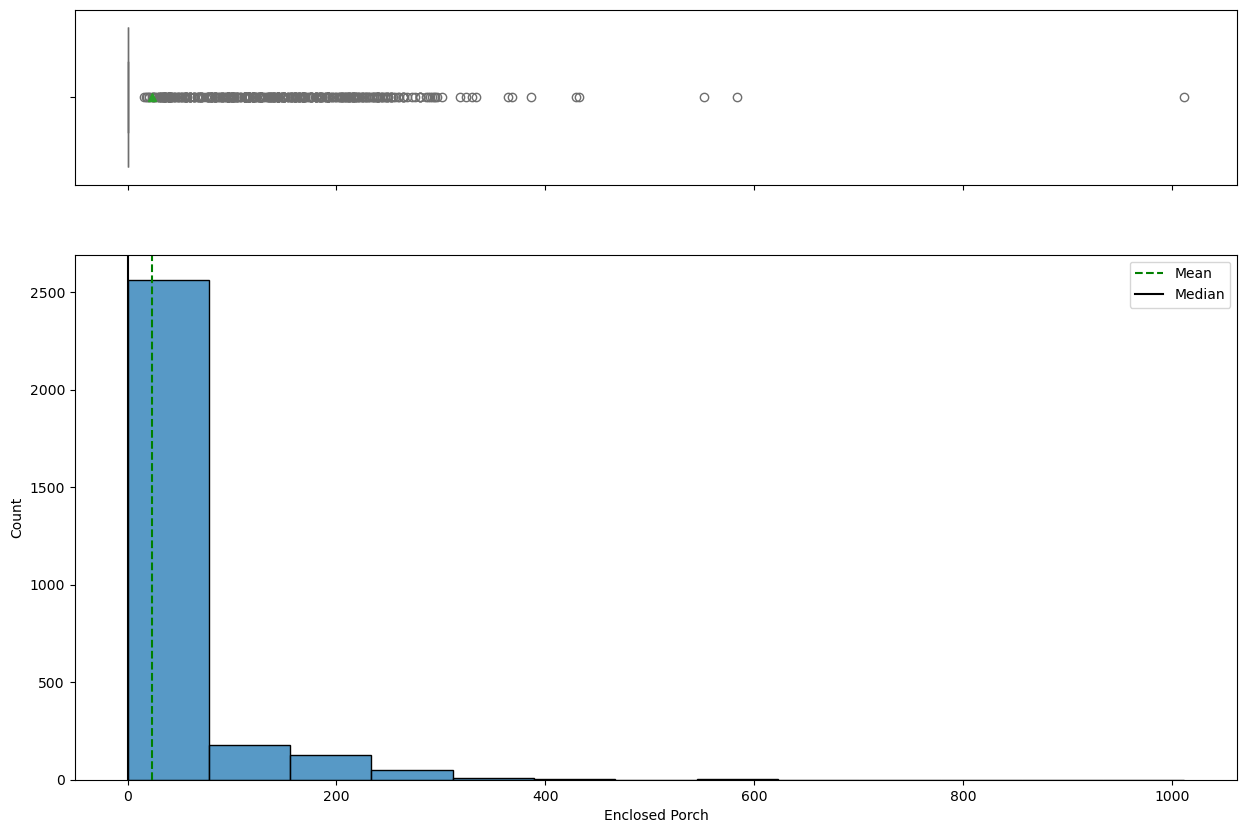

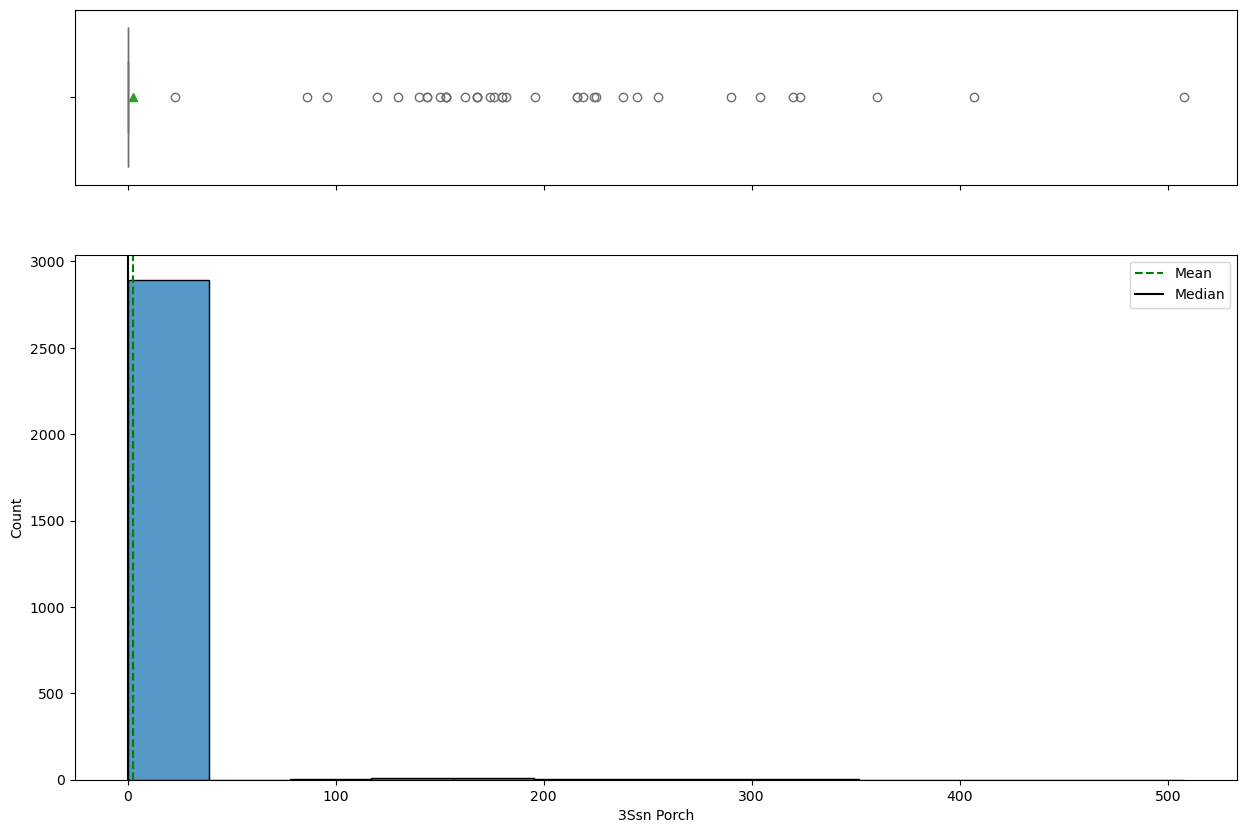

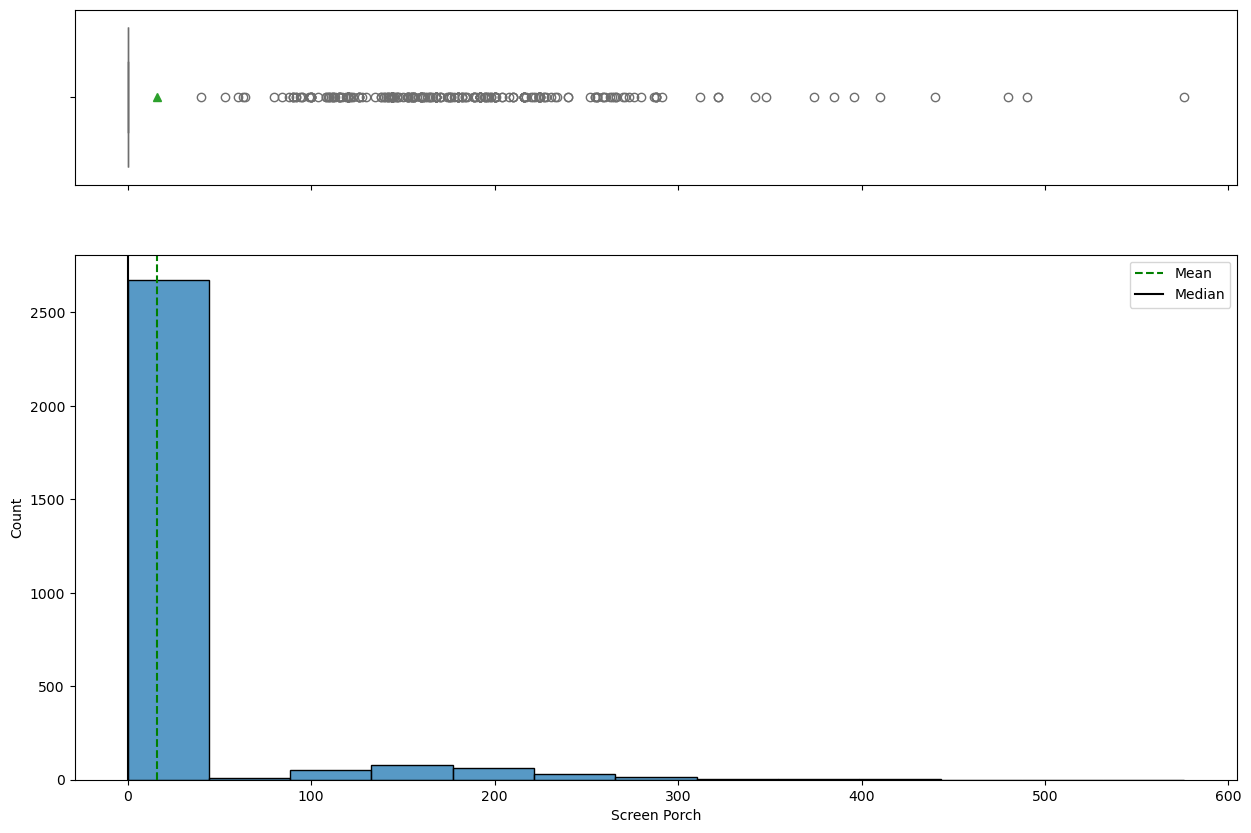

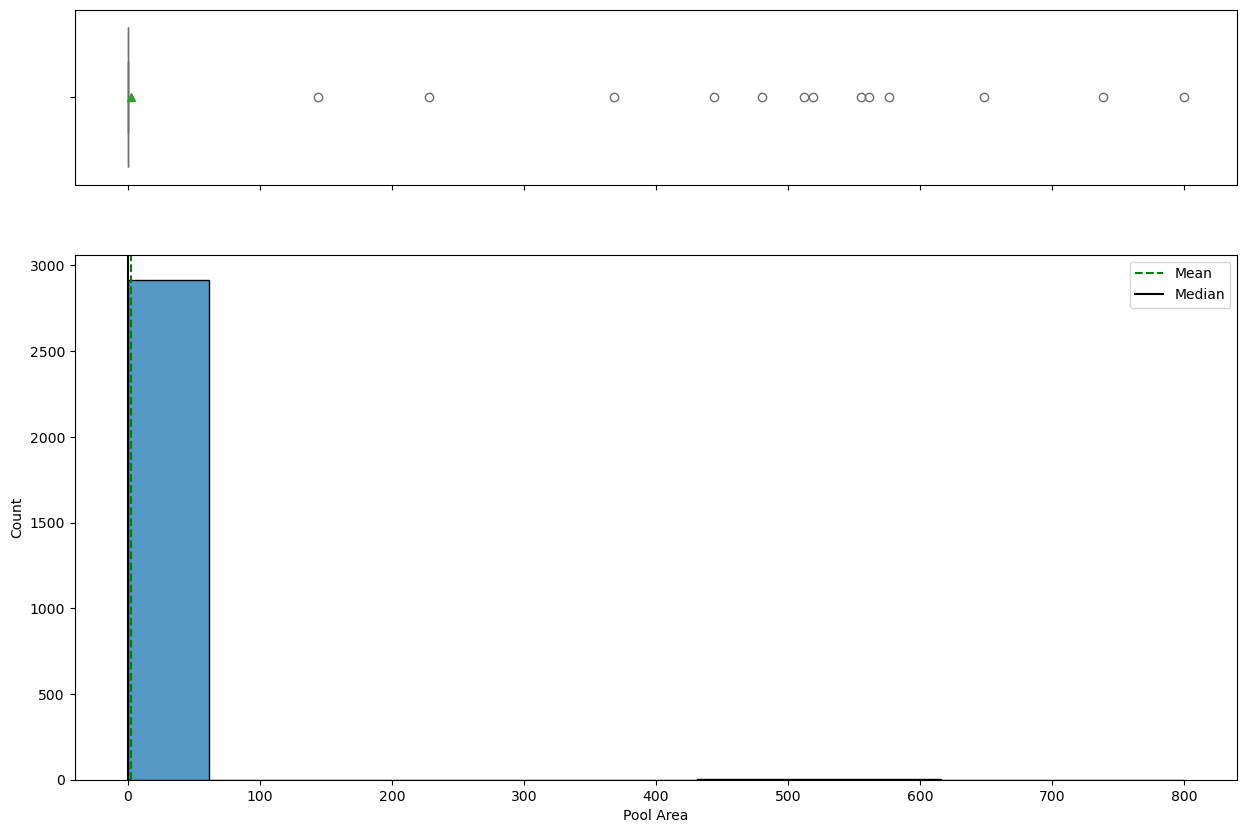

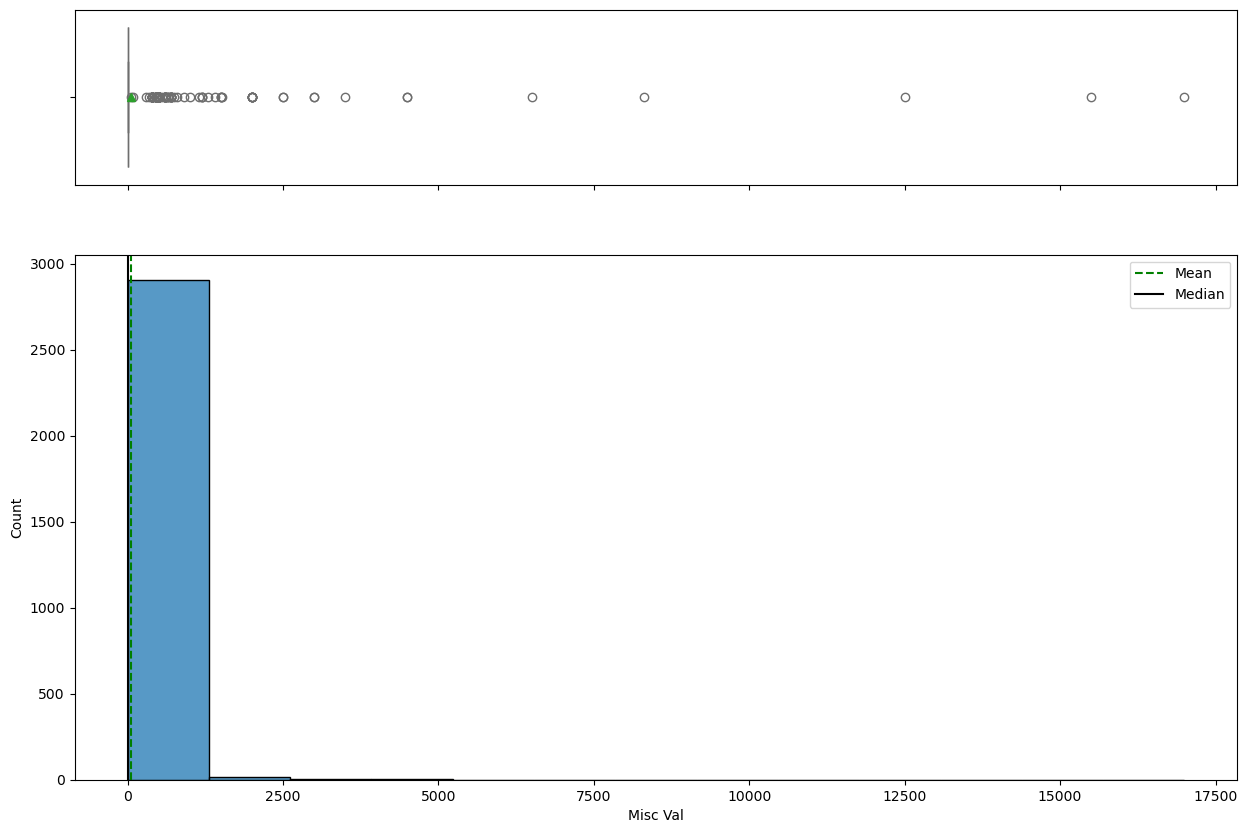

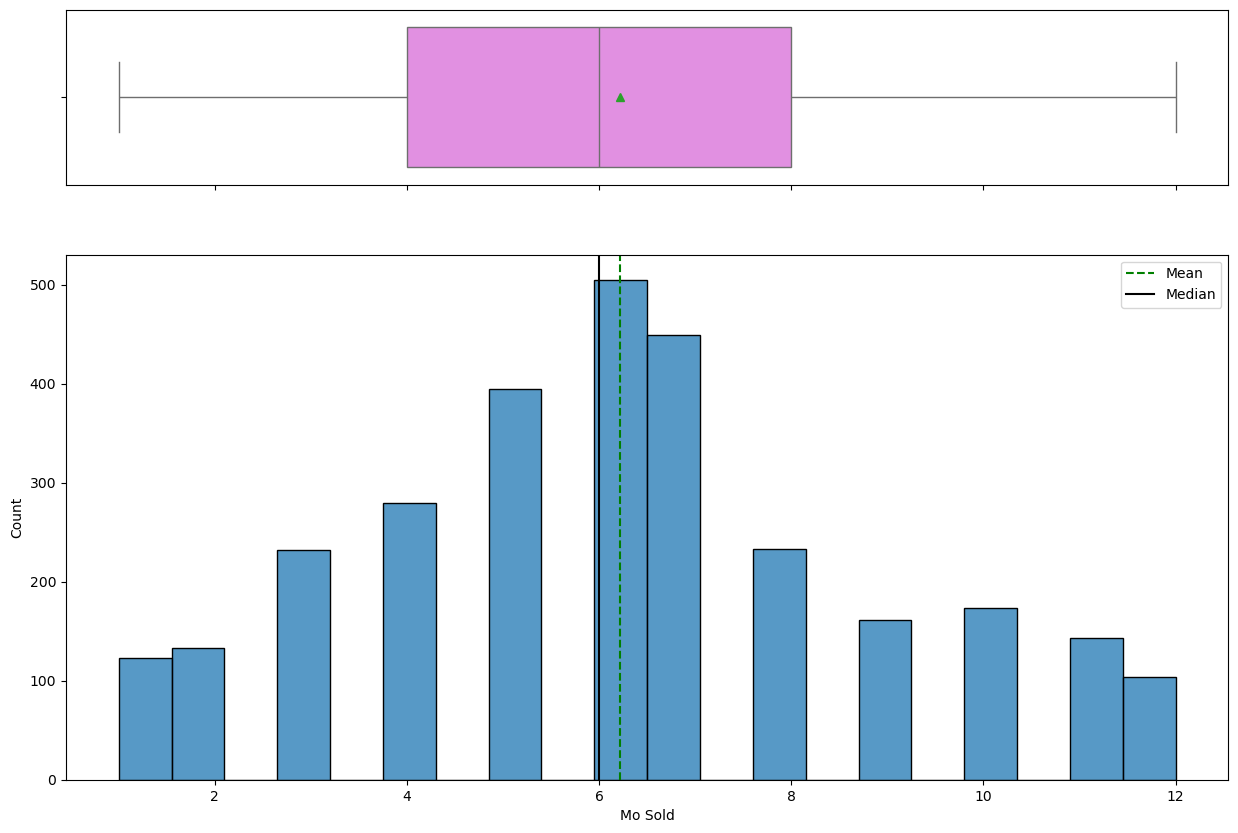

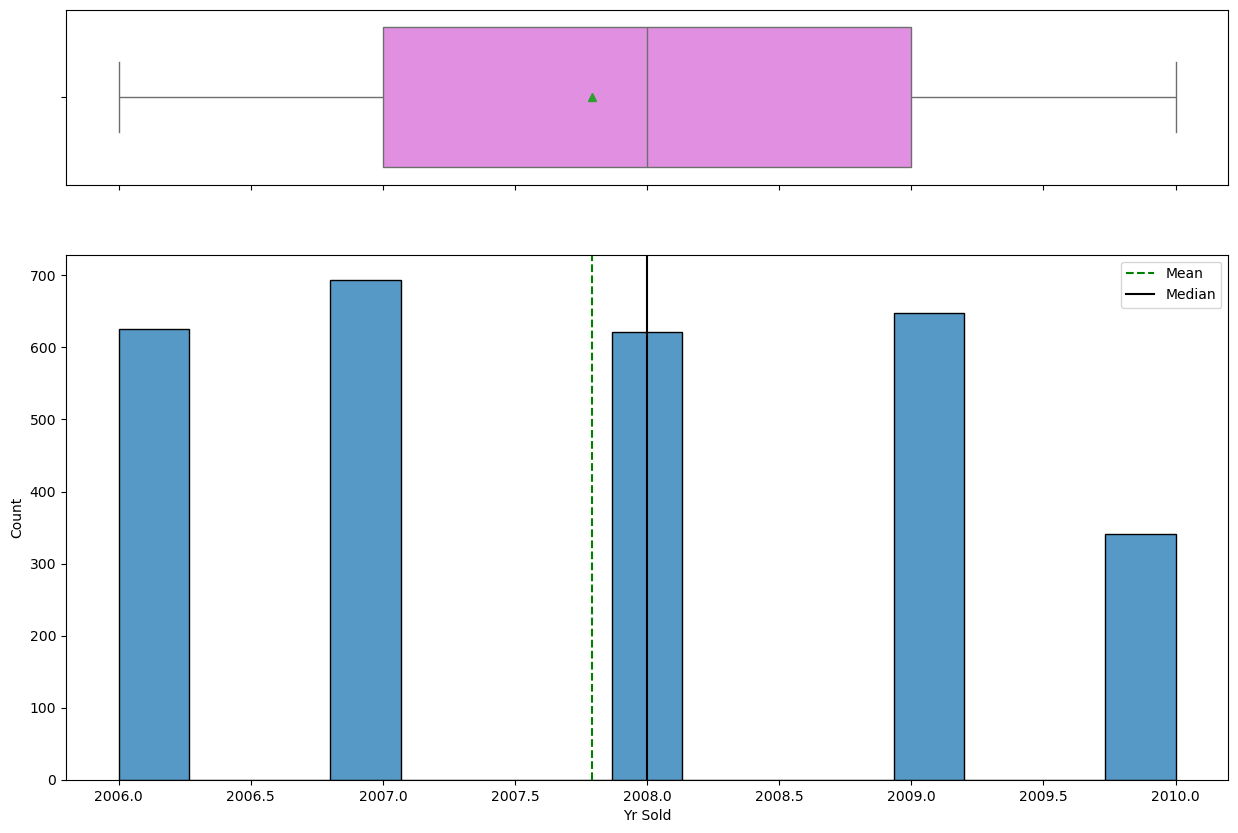

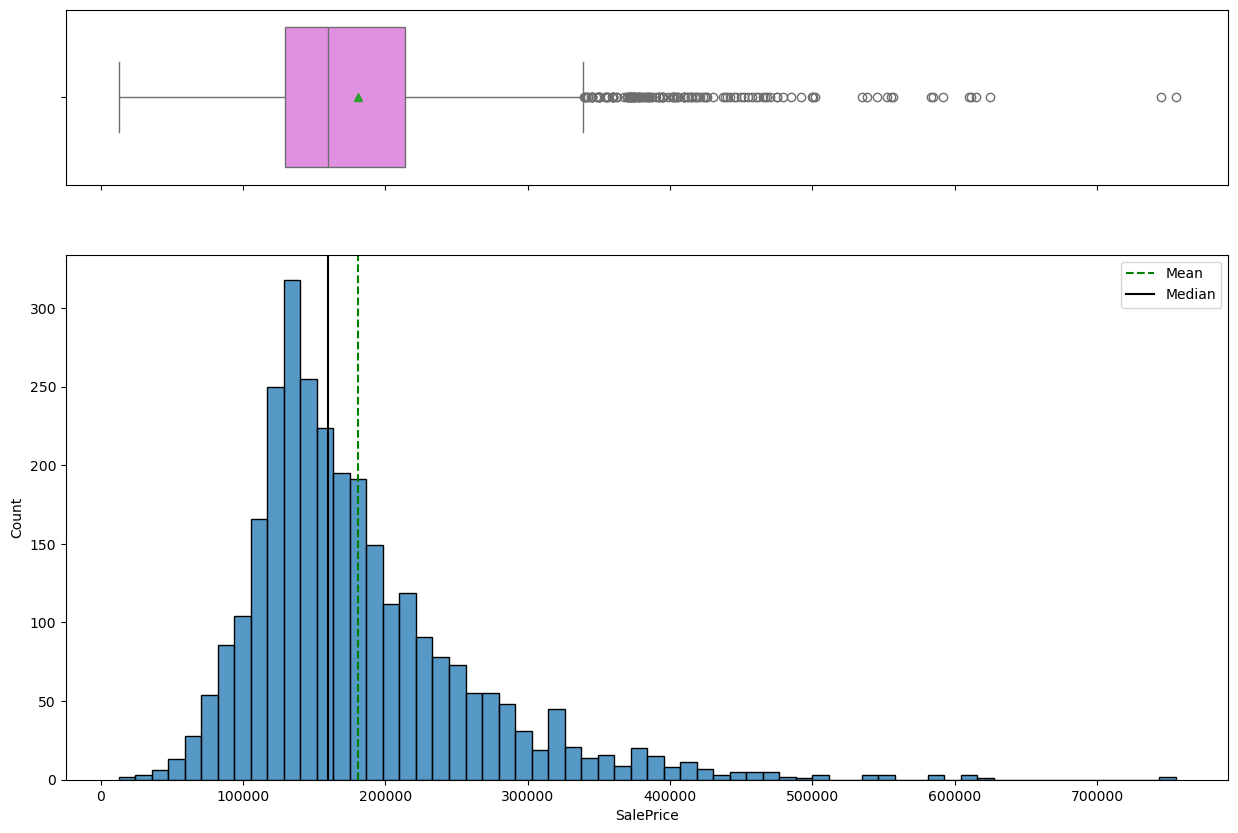

In [39]:
# Function to plot histogram and boxplot for a numeric column
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined.

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Boxplot with a mean indicator
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # Histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label="Mean"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )  # Add median to the histogram
    ax_hist2.legend()
    plt.show()

# Automatically detect numeric columns and plot
def plot_numeric_columns(dataframe):
    """
    Automatically generates boxplots and histograms for all numeric columns in the dataframe.
    
    dataframe: pandas DataFrame
    """
    # Select numeric columns
    numeric_columns = dataframe.select_dtypes(include='number')

    # Drop rows with missing values in numeric columns (optional)
    numeric_columns = numeric_columns.dropna()

    # Generate plots for each numeric column
    numeric_columns.apply(
        lambda col: histogram_boxplot(data=dataframe, feature=col.name), axis=0
    )

plot_numeric_columns(df)

In [40]:
#Exploring Categorical Features
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in Order: [   1    2    3 ... 2928 2929 2930]
Unique values in PID: [526301100 526350040 526351010 ... 923400125 924100070 924151050]
Unique values in MS SubClass: [ 20  60 120  50  85 160  80  30  90 190  45  70  75  40 180 150]
Unique values in MS Zoning: ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
Unique values in Lot Frontage: [141.  80.  81.  93.  74.  78.  41.  43.  39.  60.  75.  nan  63.  85.
  47. 152.  88. 140. 105.  65.  70.  26.  21.  53.  24. 102.  98.  83.
  94.  95.  90.  79. 100.  44. 110.  61.  36.  67. 108.  59.  92.  58.
  56.  73.  72.  84.  76.  50.  55.  68. 107.  25.  30.  57.  40.  77.
 120. 137.  87. 119.  64.  96.  71.  69.  52.  51.  54.  86. 124.  82.
  38.  48.  89.  66.  45.  35. 129.  31.  42.  28.  99. 104.  97. 103.
  34. 117. 149. 122.  62. 174. 106. 112.  32. 115. 128.  91.  33. 121.
 144. 130. 109. 150. 113. 125. 101.  46. 114. 135. 136.  37.  22. 313.
  49. 123. 160. 195. 118. 134. 182. 116. 138. 155. 126. 200. 168. 111.
 131. 

In [43]:
#printing out the number of occurences for object features and converting objects to categorical variables to help with memory
#first, Im going to convert some of the numerical columns to categorical columns
# Convert to categorical
df['MS SubClass'] = df['MS SubClass'].astype('category')
df['Overall Qual'] = df['Overall Qual'].astype('category')
df['Overall Cond'] = df['Overall Cond'].astype('category')

# Automatically select object (or string) columns
object_columns = df.select_dtypes(include=['object', 'category']).columns

# Count unique instances for each object column
unique_counts = {col: df[col].value_counts() for col in object_columns}

# Display results
for col, counts in unique_counts.items():
    print(f"Unique value counts for '{col}':\n{counts}\n")

# Convert object columns to categorical for optimization
df[object_columns] = df[object_columns].astype('category')

# Verify the columns are now categorical
#print(df.dtypes)


Unique value counts for 'MS SubClass':
MS SubClass
20     1079
60      575
50      287
120     192
30      139
160     129
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

Unique value counts for 'MS Zoning':
MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

Unique value counts for 'Street':
Street
Pave    2918
Grvl      12
Name: count, dtype: int64

Unique value counts for 'Alley':
Alley
Grvl    120
Pave     78
Name: count, dtype: int64

Unique value counts for 'Lot Shape':
Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64

Unique value counts for 'Land Contour':
Land Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64

Unique value counts for 'Utilities':
Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype

In [ ]:
#EDIT THIS CODE

# Function for labeled barplot
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with labels (count or percentage) at the top.

    data: pandas DataFrame
    feature: name of the categorical column in the DataFrame
    perc: whether to display percentages instead of counts (default is False)
    n: number of top categories to display (default is None, i.e., display all levels)
    """
    temp_data = data[feature].fillna("Missing")
    total = len(temp_data)
    unique_count = temp_data.nunique()
    plt.figure(figsize=(max(unique_count if n is None else n, 5) + 2, 6))

    order = temp_data.value_counts().index[:n]
    ax = sns.countplot(x=temp_data, palette="Paired", order=order)

    for p in ax.patches:
        value = p.get_height()
        label = f"{100 * value / total:.1f}%" if perc else f"{value}"
        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2, value),
            ha="center", va="center",
            size=12, xytext=(0, 5), textcoords="offset points",
        )
    plt.xticks(rotation=90, fontsize=12)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Percentage" if perc else "Count", fontsize=14)
    plt.title(f"Barplot for {feature}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Function to plot all categorical features
def plot_all_categorical(data, perc=False, n=None):
    """
    Generate labeled barplots for all categorical columns in a DataFrame.
    """
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) == 0:
        print("No categorical columns found in the DataFrame.")
        return

    for col in categorical_cols:
        print(f"Barplot for '{col}'")
        labeled_barplot(data, feature=col, perc=perc, n=n)

# Assuming df is your DataFrame
# Example call
plot_all_categorical(df, perc=True, n=5)


In [45]:
# Calculate missing values and their percentages
missing_data = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Combine the missing counts and percentages into a DataFrame
missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage Missing': missing_percentages
})

# Sort by missing values in descending order
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

print('Columns with missing values:')
print(missing_info)
#so much missing data!

Columns with missing values:
                Missing Values  Percentage Missing
Pool QC                   2917           99.556314
Misc Feature              2824           96.382253
Alley                     2732           93.242321
Fence                     2358           80.477816
Mas Vnr Type              1775           60.580205
Fireplace Qu              1422           48.532423
Lot Frontage               490           16.723549
Garage Cond                159            5.426621
Garage Qual                159            5.426621
Garage Finish              159            5.426621
Garage Yr Blt              159            5.426621
Garage Type                157            5.358362
Bsmt Exposure               83            2.832765
BsmtFin Type 2              81            2.764505
Bsmt Cond                   80            2.730375
Bsmt Qual                   80            2.730375
BsmtFin Type 1              80            2.730375
Mas Vnr Area                23            0.784983
Bs

In [ ]:
#heatmap of missing values to visualize if there is a pattern present
plt.figure(figsize=(20, 15))
sns.heatmap(df.isnull(), annot=True, cmap='magma') #Yellow will show where the missing values are present, structured missingness
plt.title("Correlation Heatmap of Missing Values")
plt.show()

In [ ]:
#heatmap of missing values to visualize if there is a pattern present
missing_corr = df.isnull().corr()
# Plot the correlation heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(missing_corr, annot=True, cmap='magma', center=0)
plt.title("Correlation Heatmap of Missing Values", fontsize=16)
plt.show()




In [ ]:
import pandas as pd
import plotly.figure_factory as ff

# Interactive Heatmap for Missing Values
def interactive_missing_value_heatmap(data):
    """
    Plot an interactive heatmap to show missing values in the DataFrame.

    data: pandas DataFrame
    """
    # Convert missing values to a Boolean matrix (1 for missing, 0 for non-missing)
    missing_matrix = data.isnull().astype(int)
    
    # Create an interactive heatmap
    fig = ff.create_annotated_heatmap(
        z=missing_matrix.T.values,  # Transpose so columns are on the y-axis
        x=list(range(len(data))),   # Row indices as x-axis
        y=data.columns,             # Column names as y-axis
        colorscale='Viridis',       # Choose a color theme
        showscale=True              # Show color scale
    )
    fig.update_layout(
        title="Interactive Heatmap of Missing Values",
        xaxis_title="Row Index",
        yaxis_title="Features",
        height=600, width=900
    )
    fig.show()

# Call the function
interactive_missing_value_heatmap(df)


In [ ]:
import pandas as pd
import plotly.figure_factory as ff

# Interactive Heatmap for Missing Values
def interactive_missing_value_heatmap(data):
    """
    Plot an interactive heatmap to show missing values in the DataFrame.

    data: pandas DataFrame
    """
    # Convert missing values to a Boolean matrix (1 for missing, 0 for non-missing)
    missing_matrix = data.isnull().astype(int)
    
    # Explicitly convert columns (y-axis labels) to a list
    y_labels = list(data.columns)
    
    # Create an interactive heatmap
    fig = ff.create_annotated_heatmap(
        z=missing_matrix.T.values,  # Transpose so columns are on the y-axis
        x=list(range(len(data))),   # Row indices as x-axis
        y=y_labels,                 # Column names as y-axis (converted to list)
        colorscale='Viridis',       # Choose a color theme
        showscale=True              # Show color scale
    )
    fig.update_layout(
        title="Interactive Heatmap of Missing Values",
        xaxis_title="Row Index",
        yaxis_title="Features",
        height=600, width=900
    )
    fig.show()

# Call the function
interactive_missing_value_heatmap(df)


In [ ]:

import plotly.figure_factory as ff

# Interactive Heatmap for Missing Values
def interactive_missing_value_heatmap(data):
    """
    Plot an interactive heatmap to show missing values in the DataFrame.

    data: pandas DataFrame
    """
    # Convert missing values to a Boolean matrix (1 for missing, 0 for non-missing)
    missing_matrix = data.isnull().astype(int)
    
    # Explicitly convert columns (y-axis labels) to a list
    y_labels = list(data.columns)
    
    # Create an interactive heatmap
    fig = ff.create_annotated_heatmap(
        z=missing_matrix.T.values,  # Transpose so columns are on the y-axis
        x=list(range(len(data))),   # Row indices as x-axis
        y=y_labels,                 # Column names as y-axis (converted to list)
        colorscale='Viridis',       # Choose a color theme
        showscale=True              # Show color scale
    )
    fig.update_layout(
        title="Interactive Heatmap of Missing Values",
        xaxis_title="Row Index",
        yaxis_title="Features",
        height=600, width=900
    )
    fig.show()

# Call the function
interactive_missing_value_heatmap(df)


In [ ]:
#possibly log transfom sales price due to the skew
#imbalanced classes with names of neighborhood to avoid overfitting, regularization techniques
#take a look at other 

#categorical encoding

### Bivariate Analysis

In [ ]:
#bivariate using interface
# Abstract Base Class for Bivariate Analysis Strategy
# ----------------------------------------------------
# This class defines a common interface for bivariate analysis strategies.
# Subclasses must implement the analyze method.
class BivariateAnalysisStrategy(ABC):
    @abstractmethod
    def analyze(self, df: pd.DataFrame, feature1: str, feature2: str):
        """
        Perform bivariate analysis on two features of the dataframe.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The name of the first feature/column to be analyzed.
        feature2 (str): The name of the second feature/column to be analyzed.

        Returns:
        None: This method visualizes the relationship between the two features.
        """
        pass


# Concrete Strategy for Numerical vs Numerical Analysis
# ------------------------------------------------------
# This strategy analyzes the relationship between two numerical features using scatter plots.
class NumericalVsNumericalAnalysis(BivariateAnalysisStrategy):
    def analyze(self, df: pd.DataFrame, feature1: str, feature2: str):
        """
        Plots the relationship between two numerical features using a scatter plot.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The name of the first numerical feature/column to be analyzed.
        feature2 (str): The name of the second numerical feature/column to be analyzed.

        Returns:
        None: Displays a scatter plot showing the relationship between the two features.
        """
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=feature1, y=feature2, data=df)
        plt.title(f"{feature1} vs {feature2}")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()


# Concrete Strategy for Categorical vs Numerical Analysis
# --------------------------------------------------------
# This strategy analyzes the relationship between a categorical feature and a numerical feature using box plots.
class CategoricalVsNumericalAnalysis(BivariateAnalysisStrategy):
    def analyze(self, df: pd.DataFrame, feature1: str, feature2: str):
        """
        Plots the relationship between a categorical feature and a numerical feature using a box plot.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The name of the categorical feature/column to be analyzed.
        feature2 (str): The name of the numerical feature/column to be analyzed.

        Returns:
        None: Displays a box plot showing the relationship between the categorical and numerical features.
        """
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=feature1, y=feature2, data=df)
        plt.title(f"{feature1} vs {feature2}")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.xticks(rotation=45)
        plt.show()

# Concrete Strategy for Categorical vs Numerical Analysis: Strip Plot
# -------------------------------------------------------------------
class CategoricalVsNumericalStripPlot(BivariateAnalysisStrategy):
    def analyze(self, df: pd.DataFrame, feature1: str, feature2: str):
        """
        Plots the relationship between a categorical feature and a numerical feature using a strip plot.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The name of the categorical feature/column to be analyzed.
        feature2 (str): The name of the numerical feature/column to be analyzed.

        Returns:
        None: Displays a strip plot showing the relationship between the categorical and numerical features.
        """
        plt.figure(figsize=(10, 6))
        sns.stripplot(x=feature1, y=feature2, data=df, jitter=True, size=6)
        plt.title(f"{feature1} vs {feature2} (Strip Plot)")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.xticks(rotation=45)
        plt.show()


# Concrete Strategy for Categorical vs Numerical Analysis: Bar Plot with Summary Statistics
# -----------------------------------------------------------------------------------------
class CategoricalVsNumericalBarPlot(BivariateAnalysisStrategy):
    def analyze(self, df: pd.DataFrame, feature1: str, feature2: str):
        """
        Plots the relationship between a categorical feature and a numerical feature using a bar plot with summary statistics.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The name of the categorical feature/column to be analyzed.
        feature2 (str): The name of the numerical feature/column to be analyzed.

        Returns:
        None: Displays a bar plot showing the mean and standard error of the numerical feature for each category.
        """
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature1, y=feature2, data=df, ci="sd", capsize=0.2)
        plt.title(f"{feature1} vs {feature2} (Bar Plot with Summary Statistics)")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.xticks(rotation=45)
        plt.show()



# Context Class that uses a BivariateAnalysisStrategy
# ---------------------------------------------------
# This class allows you to switch between different bivariate analysis strategies.
class BivariateAnalyzer:
    def __init__(self, strategy: BivariateAnalysisStrategy):
        """
        Initializes the BivariateAnalyzer with a specific analysis strategy.

        Parameters:
        strategy (BivariateAnalysisStrategy): The strategy to be used for bivariate analysis.

        Returns:
        None
        """
        self._strategy = strategy

    def set_strategy(self, strategy: BivariateAnalysisStrategy):
        """
        Sets a new strategy for the BivariateAnalyzer.

        Parameters:
        strategy (BivariateAnalysisStrategy): The new strategy to be used for bivariate analysis.

        Returns:
        None
        """
        self._strategy = strategy

    def execute_analysis(self, df: pd.DataFrame, feature1: str, feature2: str):
        """
        Executes the bivariate analysis using the current strategy.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The name of the first feature/column to be analyzed.
        feature2 (str): The name of the second feature/column to be analyzed.

        Returns:
        None: Executes the strategy's analysis method and visualizes the results.
        """
        self._strategy.analyze(df, feature1, feature2)


# Example usage
if __name__ == "__main__":
    # Example usage of the BivariateAnalyzer with different strategies.

    # Load the data
    # df = pd.read_csv('../extracted-data/your_data_file.csv')

    # Analyzing relationship between two numerical features
    # analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
    # analyzer.execute_analysis(df, 'Gr Liv Area', 'SalePrice')

    # Analyzing relationship between a categorical and a numerical feature
    # analyzer.set_strategy(CategoricalVsNumericalAnalysis())
    # analyzer.execute_analysis(df, 'Overall Qual', 'SalePrice')

    # Analyzing relationship between a categorical and a numerical feature using a strip plot
    # analyzer = BivariateAnalyzer(CategoricalVsNumericalStripPlot())
    # analyzer.execute_analysis(df, 'Overall Qual', 'SalePrice')

    # Analyzing relationship between a categorical and a numerical feature using a bar plot
    # analyzer.set_strategy(CategoricalVsNumericalBarPlot())
    # analyzer.execute_analysis(df, 'Overall Qual', 'SalePrice')
    pass

In [ ]:
# Create an analyzer for Categorical vs Numerical analysis for Quality and Sale Price
analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
analyzer.execute_analysis(df, 'Overall Qual', 'SalePrice')

In [ ]:
#Analyzing relationship between two numerical features Living area and Sales Price
analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
analyzer.execute_analysis(df, 'Gr Liv Area', 'SalePrice')

In [ ]:
#House Style and Sales Price
# Analyzing relationship between a categorical and a numerical feature using a strip plot using House Style and Sale Price
analyzer = BivariateAnalyzer(CategoricalVsNumericalStripPlot())
analyzer.execute_analysis(df, 'House Style', 'SalePrice')

In [ ]:
# Analyzing relationship between two numerical features Lot area and Frontage
analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
analyzer.execute_analysis(df, 'Lot Frontage', 'Lot Area')

### Multivariate Analysis

In [ ]:
#multivariate using interface
# Abstract Base Class for Multivariate Analysis
# ----------------------------------------------
# This class defines a template for performing multivariate analysis.
# Subclasses can override specific steps like correlation heatmap and pair plot generation.
class MultivariateAnalysisTemplate(ABC):
    def analyze(self, df: pd.DataFrame):
        """
        Perform a comprehensive multivariate analysis by generating a correlation heatmap and pair plot.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data to be analyzed.

        Returns:
        None: This method orchestrates the multivariate analysis process.
        """
        self.generate_correlation_heatmap(df)
        self.generate_pairplot(df)

    @abstractmethod
    def generate_correlation_heatmap(self, df: pd.DataFrame):
        """
        Generate and display a heatmap of the correlations between features.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data to be analyzed.

        Returns:
        None: This method should generate and display a correlation heatmap.
        """
        pass

    @abstractmethod
    def generate_pairplot(self, df: pd.DataFrame):
        """
        Generate and display a pair plot of the selected features.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data to be analyzed.

        Returns:
        None: This method should generate and display a pair plot.
        """
        pass


# Concrete Class for Multivariate Analysis with Correlation Heatmap and Pair Plot
# -------------------------------------------------------------------------------
# This class implements the methods to generate a correlation heatmap and a pair plot.
class SimpleMultivariateAnalysis(MultivariateAnalysisTemplate):
    def generate_correlation_heatmap(self, df: pd.DataFrame):
        """
        Generates and displays a correlation heatmap for the numerical features in the dataframe.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data to be analyzed.

        Returns:
        None: Displays a heatmap showing correlations between numerical features.
        """
        plt.figure(figsize=(12, 10))
        sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

    def generate_pairplot(self, df: pd.DataFrame):
        """
        Generates and displays a pair plot for the selected features in the dataframe.

        Parameters:
        df (pd.DataFrame): The dataframe containing the data to be analyzed.

        Returns:
        None: Displays a pair plot for the selected features.
        """
        sns.pairplot(df)
        plt.suptitle("Pair Plot of Selected Features", y=1.02)
        plt.show()


# Example usage
if __name__ == "__main__":
    # Example usage of the SimpleMultivariateAnalysis class.

    # Load the data
    # df = pd.read_csv('../extracted-data/your_data_file.csv')

    # Perform Multivariate Analysis
    # multivariate_analyzer = SimpleMultivariateAnalysis()

    # Select important features for pair plot
    # selected_features = df[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']]

    # Execute the analysis
    # multivariate_analyzer.analyze(selected_features)
    pass


In [ ]:
#complete more multivariate analysis using groupme and ggplot faceting